<a href="https://colab.research.google.com/github/marta-0/medical_mnist/blob/main/Medical-MNIST-results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical MNIST - Results

In [2]:
import numpy as np
import pandas as pd
import statistics

from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, f1_score, average_precision_score

import tensorflow as tf

import zipfile

Load saved results, models and datasets:

In [3]:
with zipfile.ZipFile('results.zip','r') as zippedfile:
  zippedfile.extractall()

with zipfile.ZipFile('models.zip','r') as zippedfile:
  zippedfile.extractall()

with zipfile.ZipFile('data_24.zip','r') as zippedfile:
  zippedfile.extractall()

with zipfile.ZipFile('data_32_40.zip','r') as zippedfile:
  zippedfile.extractall()

with zipfile.ZipFile('data_48.zip','r') as zippedfile:
  zippedfile.extractall()

with zipfile.ZipFile('data_64.zip','r') as zippedfile:
  zippedfile.extractall()

In [ ]:
model_baseline = tf.keras.models.load_model('models/baseline')
model_gmp = tf.keras.models.load_model('models/gmp')
model_gmp_hflip_rot180 = tf.keras.models.load_model('models/gmp_hflip_rot180')
model_hflip = tf.keras.models.load_model('models/hflip')
model_rot180 = tf.keras.models.load_model('models/rotate180')
model_d01 = tf.keras.models.load_model('models/dropout_01')
model_d2_01 = tf.keras.models.load_model('models/dropout_2_01')
model_best = tf.keras.models.load_model('models/gmp+hflip+rot180+bn128')
model_32 = tf.keras.models.load_model('models/size32_32')
model_gmp_hflip = tf.keras.models.load_model('models/gmp_hflip')
model_gmp_var_sizes = tf.keras.models.load_model('models/gmp_various_sizes')
model_best_var_sizes = tf.keras.models.load_model('models/best_various_sizes')

In [ ]:
X_test_24 = np.load('/content/data_24/X_test_24.npy')
y_test_24 = np.load('/content/data_24/y_test_24.npy')
X_test_32 = np.load('/content/data_32_40/X_test_32.npy')
y_test_32 = np.load('/content/data_32_40/y_test_32.npy')
X_test_40 = np.load('/content/data_32_40/X_test_40.npy')
y_test_40 = np.load('/content/data_32_40/y_test_40.npy')
X_test_48 = np.load('/content/data_48/X_test_48.npy')
y_test_48 = np.load('/content/data_48/y_test_48.npy')
X_test_64 = np.load('/content/data_64/X_test.npy')
y_test_64 = np.load('/content/data_64/y_test.npy')

Functions for calculating and plotting metrics:

In [ ]:
def metrics(errors, acc, val_acc, loss, val_loss):
  index = acc.shape[1] - 1
  print('Accuracy: ', round(np.mean(acc, axis=0)[index], 7), ' ± ', round(np.std(acc, axis=0)[index], 7))
  print('Val_accuracy: ', round(np.mean(val_acc, axis=0)[index], 7), ' ± ', round(np.std(val_acc, axis=0)[index], 7))
  print('Loss: ', round(np.mean(loss, axis=0)[index], 7), ' ± ', round(np.std(loss, axis=0)[index], 7))
  print('Val_loss: ', round(np.mean(val_loss, axis=0)[index], 7), ' ± ', round(np.std(val_loss, axis=0)[index], 7))

  print('\nNumber of mistakes:')
  print('Average: ', sum(errors) / len(errors))
  print('Median: ', statistics.median(errors))
  print('Standard deviation: ', round(statistics.stdev(errors), 2))
  plt.hist(errors)
  plt.xlabel('Number of mistakes', fontsize=15);


def plot_acc_loss(acc, val_acc, loss, val_loss, index, num_errors, title):
  plt.figure(figsize=(20,6))
  plt.suptitle('{}: {}'.format(title, num_errors), fontsize=15)

  plt.subplot(1,2,1)
  plt.plot(acc[index], label='accuracy')
  plt.plot(val_acc[index], label='val_accuracy')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Accuracy', fontsize=15)
  plt.legend(loc=4)

  plt.subplot(1,2,2)
  plt.plot(loss[index], label='loss')
  plt.plot(val_loss[index], label='val_loss')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Loss', fontsize=15)
  plt.legend();

## Baseline

In [4]:
errors_base = np.load('/content/results/baseline/errors_cnt.npy')

Średnia:  9.98
Mediana:  10.0
Odchylenie standardowe:  2.24


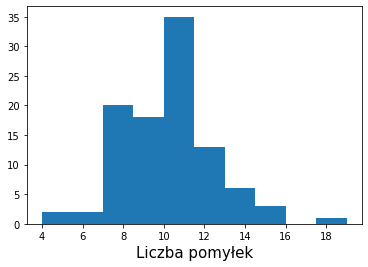

In [5]:
print('Średnia: ', sum(errors_base) / len(errors_base))
print('Mediana: ', statistics.median(errors_base))
print('Odchylenie standardowe: ', round(statistics.stdev(errors_base), 2))
plt.hist(errors_base)
plt.xlabel('Liczba pomyłek', fontsize=15);

## Input image size 32 x 32 px

In [ ]:
errors_32 = np.load('/content/results/size_32_32/errors_cnt.npy')
acc_32 = np.load('/content/results/size_32_32/history_acc.npy')
val_acc_32 = np.load('/content/results/size_32_32/history_val_acc.npy')
loss_32 = np.load('/content/results/size_32_32/history_loss.npy')
val_loss_32 = np.load('/content/results/size_32_32/history_val_loss.npy')

Accuracy:  0.9999496  ±  0.0001644
Val_accuracy:  0.9992848  ±  0.0002118
Loss:  0.0002416  ±  0.0008372
Val_loss:  0.0064449  ±  0.001376

Number of mistakes:
Average:  12.65
Median:  12.0
Standard deviation:  3.74


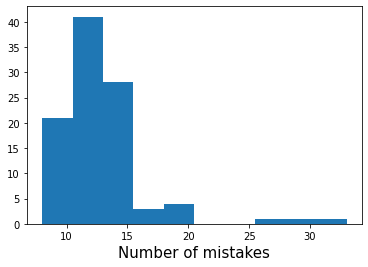

In [ ]:
metrics(errors_32, acc_32, val_acc_32, loss_32, val_loss_32)

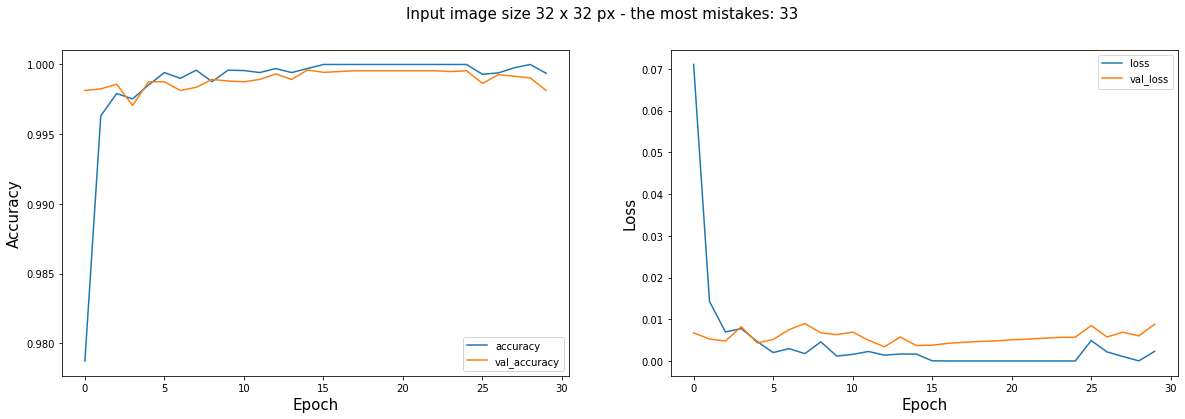

In [ ]:
plot_acc_loss(acc_32, val_acc_32, loss_32, val_loss_32, list(errors_32).index(max(errors_32)), max(errors_32), 'Input image size 32 x 32 px - the most mistakes')

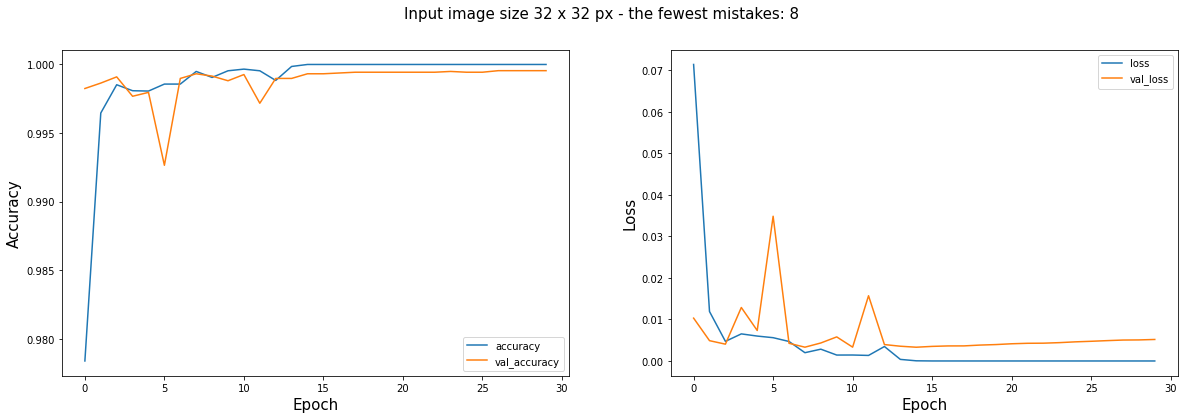

In [ ]:
plot_acc_loss(acc_32, val_acc_32, loss_32, val_loss_32, list(errors_32).index(min(errors_32)), min(errors_32), 'Input image size 32 x 32 px - the fewest mistakes')

## Dropout 0.1

In [ ]:
errors_d01 = np.load('/content/results/dropout_01/errors_cnt.npy')
acc_d01 = np.load('/content/results/dropout_01/history_acc.npy')
val_acc_d01 = np.load('/content/results/dropout_01/history_val_acc.npy')
loss_d01 = np.load('/content/results/dropout_01/history_loss.npy')
val_loss_d01 = np.load('/content/results/dropout_01/history_val_loss.npy')

Accuracy:  0.9998502  ±  0.0002859
Val_accuracy:  0.9993289  ±  0.0004587
Loss:  0.0008636  ±  0.0018681
Val_loss:  0.0065985  ±  0.0048416

Number of mistakes:
Average:  11.87
Median:  10.0
Standard deviation:  8.12


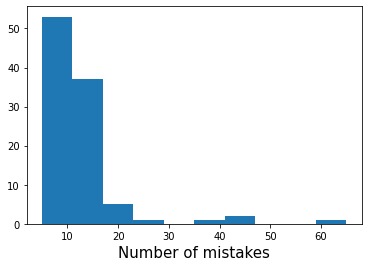

In [ ]:
metrics(errors_d01, acc_d01, val_acc_d01, loss_d01, val_loss_d01)

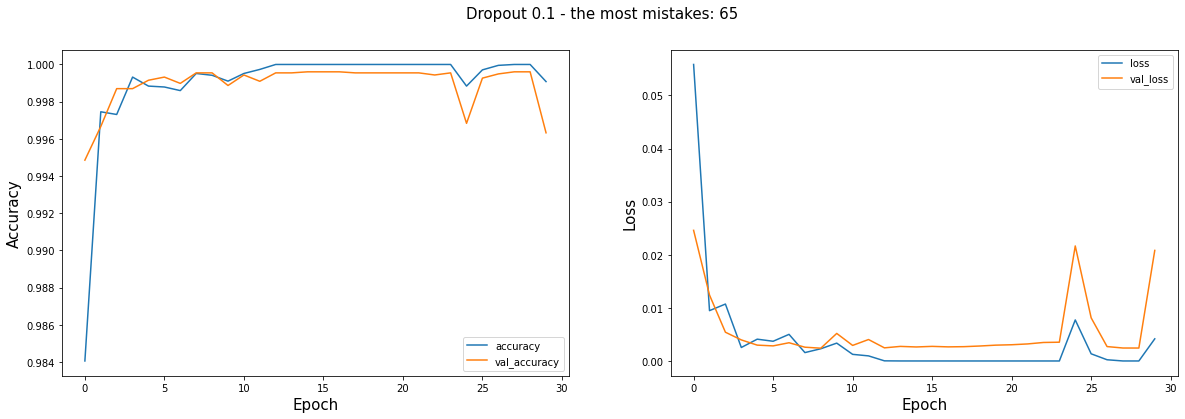

In [ ]:
plot_acc_loss(acc_d01, val_acc_d01, loss_d01, val_loss_d01, list(errors_d01).index(max(errors_d01)), max(errors_d01), 'Dropout 0.1 - the most mistakes')

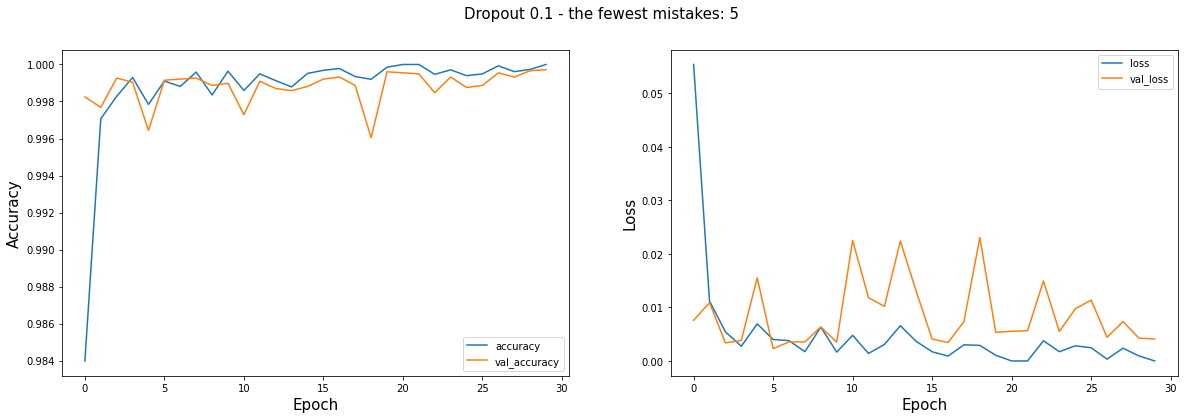

In [ ]:
plot_acc_loss(acc_d01, val_acc_d01, loss_d01, val_loss_d01, list(errors_d01).index(min(errors_d01)), min(errors_d01), 'Dropout 0.1 - the fewest mistakes')

## Dropout 0.2

In [ ]:
errors_d02 = np.load('/content/results/dropout_02/errors_cnt.npy')
acc_d02 = np.load('/content/results/dropout_02/history_acc.npy')
val_acc_d02 = np.load('/content/results/dropout_02/history_val_acc.npy')
loss_d02 = np.load('/content/results/dropout_02/history_loss.npy')
val_loss_d02 = np.load('/content/results/dropout_02/history_val_loss.npy')

Accuracy:  0.9997717  ±  0.0003045
Val_accuracy:  0.9992147  ±  0.0004112
Loss:  0.0012933  ±  0.001854
Val_loss:  0.0079918  ±  0.0049673

Number of mistakes:
Average:  13.89
Median:  12.0
Standard deviation:  7.28


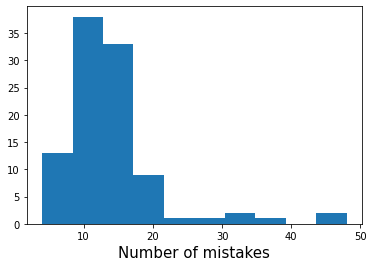

In [ ]:
metrics(errors_d02, acc_d02, val_acc_d02, loss_d02, val_loss_d02)

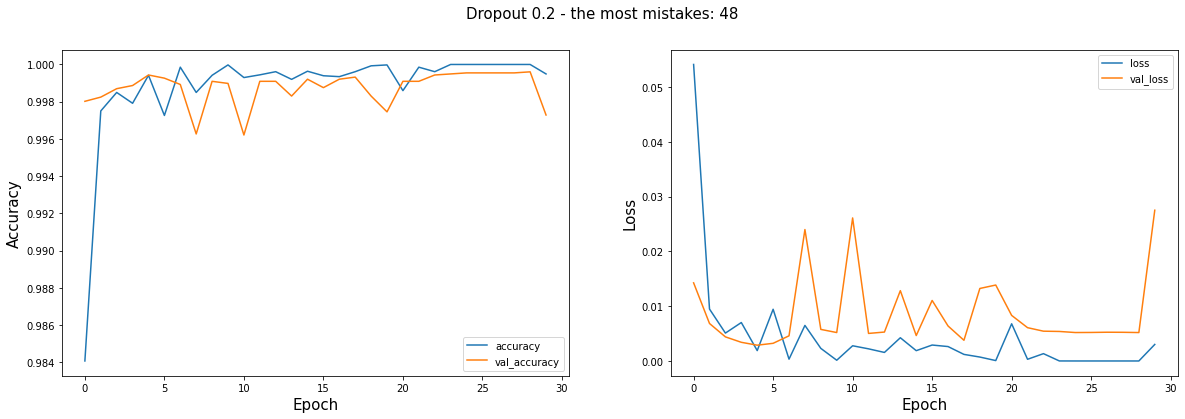

In [ ]:
plot_acc_loss(acc_d02, val_acc_d02, loss_d02, val_loss_d02, list(errors_d02).index(max(errors_d02)), max(errors_d02), 'Dropout 0.2 - the most mistakes')

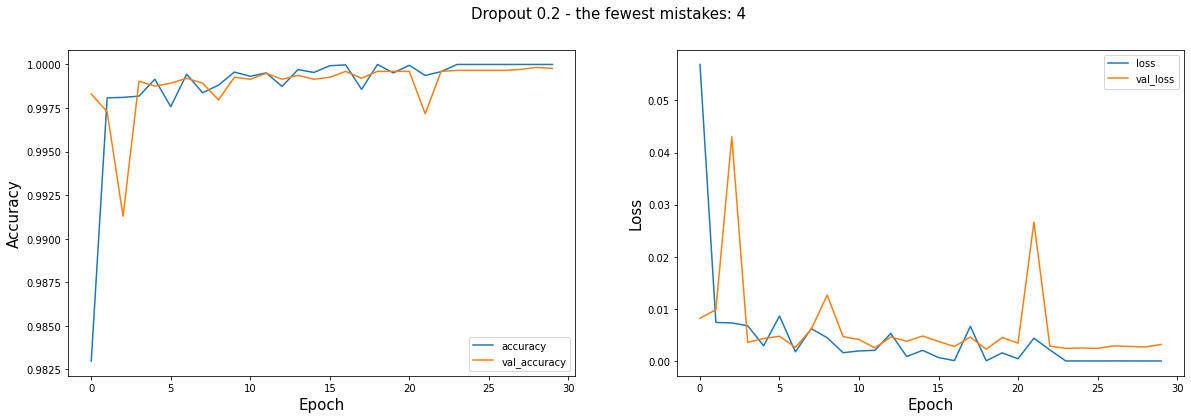

In [ ]:
plot_acc_loss(acc_d02, val_acc_d02, loss_d02, val_loss_d02, list(errors_d02).index(min(errors_d02)), min(errors_d02), 'Dropout 0.2 - the fewest mistakes')

## Dropout 0.3

In [ ]:
errors_d03 = np.load('/content/results/dropout_03/errors_cnt.npy')
acc_d03 = np.load('/content/results/dropout_03/history_acc.npy')
val_acc_d03 = np.load('/content/results/dropout_03/history_val_acc.npy')
loss_d03 = np.load('/content/results/dropout_03/history_loss.npy')
val_loss_d03 = np.load('/content/results/dropout_03/history_val_loss.npy')

Accuracy:  0.9997274  ±  0.0002733
Val_accuracy:  0.9991361  ±  0.0003669
Loss:  0.0015462  ±  0.0017363
Val_loss:  0.008702  ±  0.0044166

Number of mistakes:
Average:  15.28
Median:  14.0
Standard deviation:  6.48


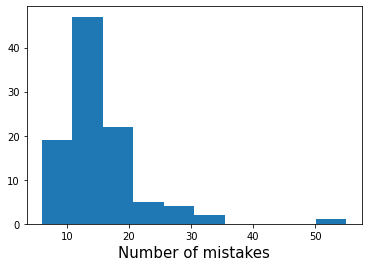

In [ ]:
metrics(errors_d03, acc_d03, val_acc_d03, loss_d03, val_loss_d03)

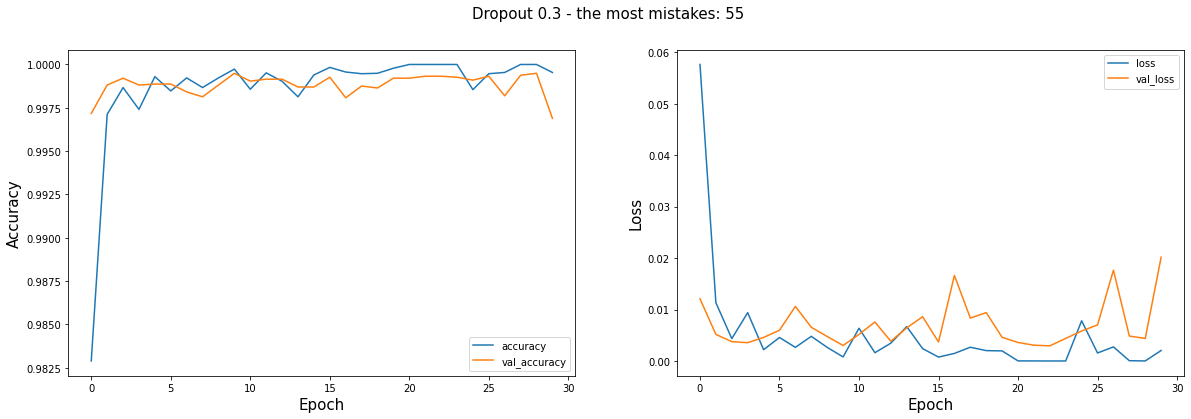

In [ ]:
plot_acc_loss(acc_d03, val_acc_d03, loss_d03, val_loss_d03, list(errors_d03).index(max(errors_d03)), max(errors_d03), 'Dropout 0.3 - the most mistakes')

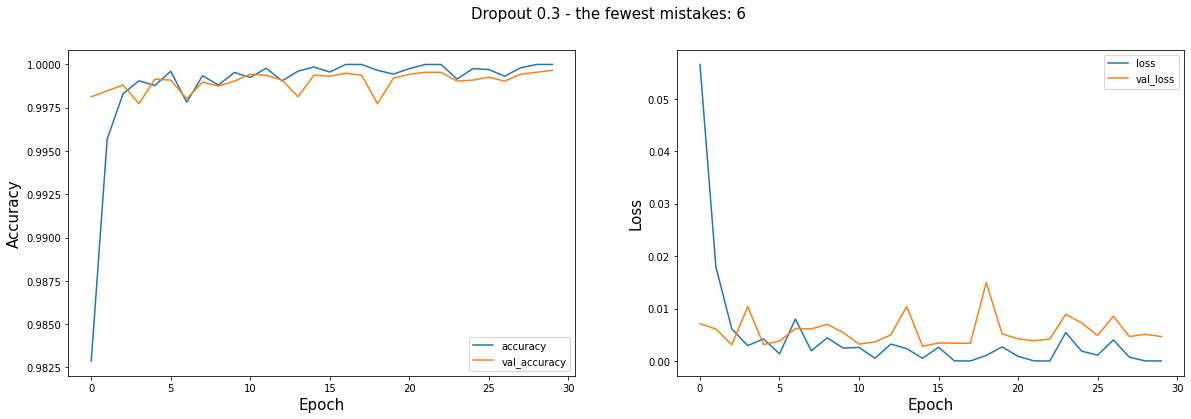

In [ ]:
plot_acc_loss(acc_d03, val_acc_d03, loss_d03, val_loss_d03, list(errors_d03).index(min(errors_d03)), min(errors_d03), 'Dropout 0.3 - the fewest mistakes')

## Dropout 2x 0.1

In [ ]:
errors_d2_01 = np.load('/content/results/dropout_2_01/errors_cnt.npy')
acc_d2_01 = np.load('/content/results/dropout_2_01/history_acc.npy')
val_acc_d2_01 = np.load('/content/results/dropout_2_01/history_val_acc.npy')
loss_d2_01 = np.load('/content/results/dropout_2_01/history_loss.npy')
val_loss_d2_01 = np.load('/content/results/dropout_2_01/history_val_loss.npy')

Accuracy:  0.9996816  ±  0.0003009
Val_accuracy:  0.9987612  ±  0.0008169
Loss:  0.0019796  ±  0.0022692
Val_loss:  0.0190133  ±  0.010155

Number of mistakes:
Average:  21.91
Median:  19.0
Standard deviation:  14.49


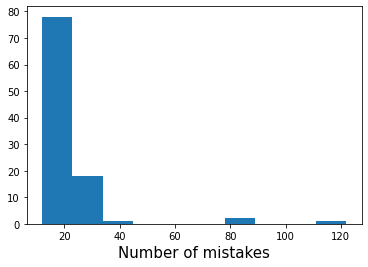

In [ ]:
metrics(errors_d2_01, acc_d2_01, val_acc_d2_01, loss_d2_01, val_loss_d2_01)

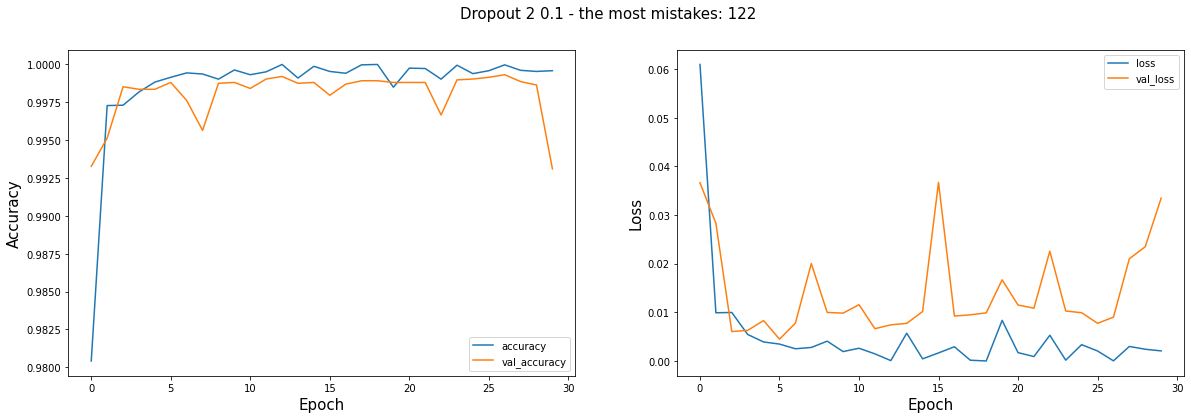

In [ ]:
plot_acc_loss(acc_d2_01, val_acc_d2_01, loss_d2_01, val_loss_d2_01, list(errors_d2_01).index(max(errors_d2_01)), max(errors_d2_01), 'Dropout 2 0.1 - the most mistakes')

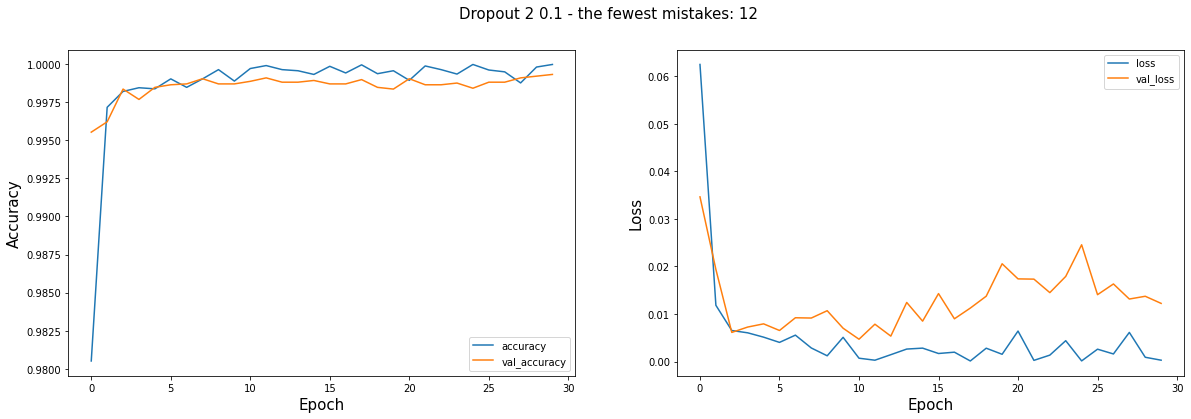

In [ ]:
plot_acc_loss(acc_d2_01, val_acc_d2_01, loss_d2_01, val_loss_d2_01, list(errors_d2_01).index(min(errors_d2_01)), min(errors_d2_01), 'Dropout 2 0.1 - the fewest mistakes')

## Dropout 2x 0.2

In [ ]:
errors_d2_02 = np.load('/content/results/dropout_2_02/errors_cnt.npy')
acc_d2_02 = np.load('/content/results/dropout_2_02/history_acc.npy')
val_acc_d2_02 = np.load('/content/results/dropout_2_02/history_val_acc.npy')
loss_d2_02 = np.load('/content/results/dropout_2_02/history_loss.npy')
val_loss_d2_02 = np.load('/content/results/dropout_2_02/history_val_loss.npy')

Accuracy:  0.9996612  ±  0.0002559
Val_accuracy:  0.999127  ±  0.0004934
Loss:  0.0019129  ±  0.0017759
Val_loss:  0.0093472  ±  0.0056257

Number of mistakes:
Average:  15.44
Median:  13.0
Standard deviation:  8.72


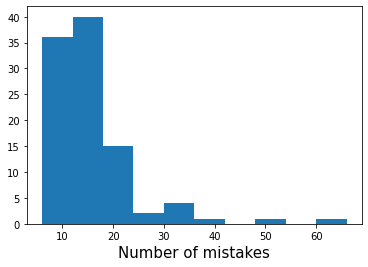

In [ ]:
metrics(errors_d2_02, acc_d2_02, val_acc_d2_02, loss_d2_02, val_loss_d2_02)

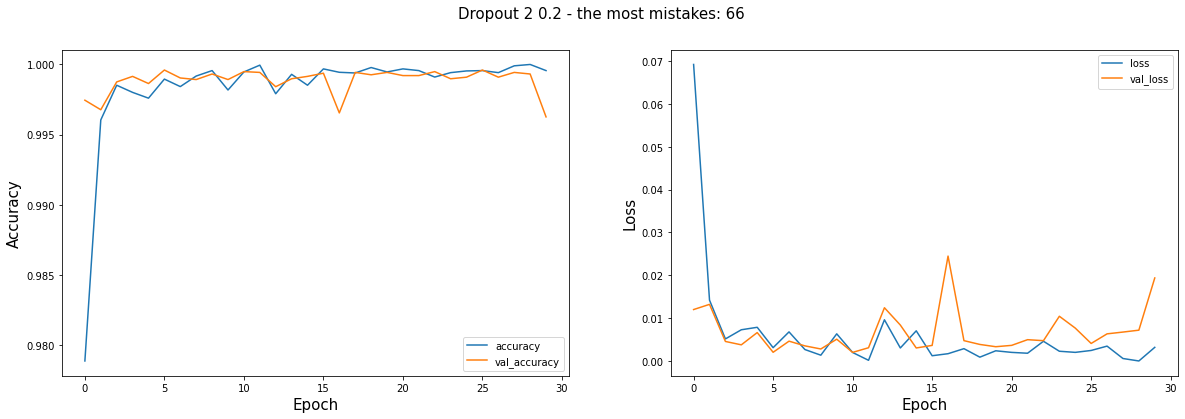

In [ ]:
plot_acc_loss(acc_d2_02, val_acc_d2_02, loss_d2_02, val_loss_d2_02, list(errors_d2_02).index(max(errors_d2_02)), max(errors_d2_02), 'Dropout 2 0.2 - the most mistakes')

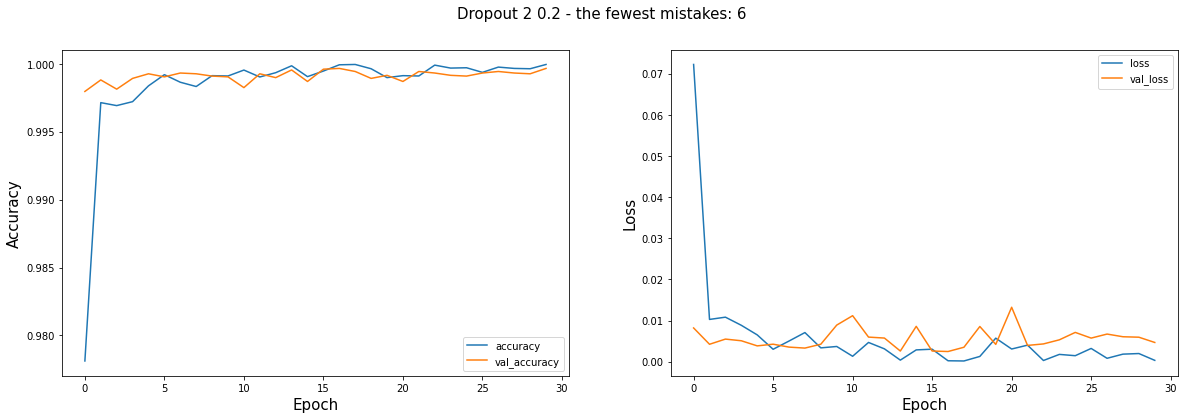

In [ ]:
plot_acc_loss(acc_d2_02, val_acc_d2_02, loss_d2_02, val_loss_d2_02, list(errors_d2_02).index(min(errors_d2_02)), min(errors_d2_02), 'Dropout 2 0.2 - the fewest mistakes')

## Dropout 2x 0.3

In [ ]:
errors_d2_03 = np.load('/content/results/dropout_2_03/errors_cnt.npy')
acc_d2_03 = np.load('/content/results/dropout_2_03/history_acc.npy')
val_acc_d2_03 = np.load('/content/results/dropout_2_03/history_val_acc.npy')
loss_d2_03 = np.load('/content/results/dropout_2_03/history_loss.npy')
val_loss_d2_03 = np.load('/content/results/dropout_2_03/history_val_loss.npy')

Accuracy:  0.9995733  ±  0.0002645
Val_accuracy:  0.9991157  ±  0.0008815
Loss:  0.0022376  ±  0.0016017
Val_loss:  0.0091411  ±  0.0110116

Number of mistakes:
Average:  15.64
Median:  13.0
Standard deviation:  15.65


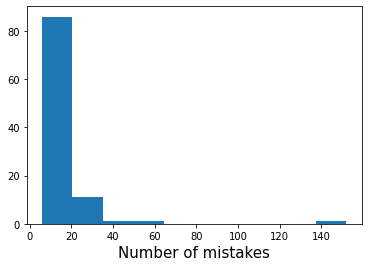

In [ ]:
metrics(errors_d2_03, acc_d2_03, val_acc_d2_03, loss_d2_03, val_loss_d2_03)

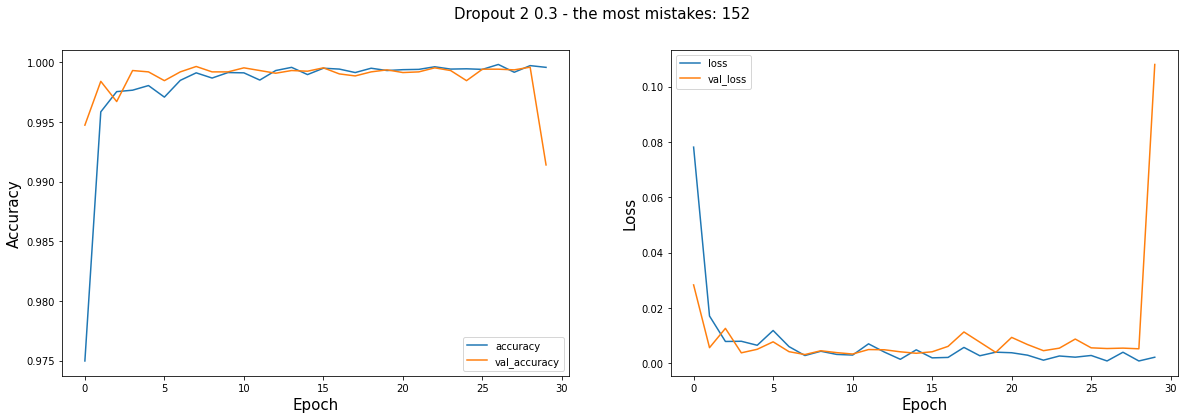

In [ ]:
plot_acc_loss(acc_d2_03, val_acc_d2_03, loss_d2_03, val_loss_d2_03, list(errors_d2_03).index(max(errors_d2_03)), max(errors_d2_03), 'Dropout 2 0.3 - the most mistakes')

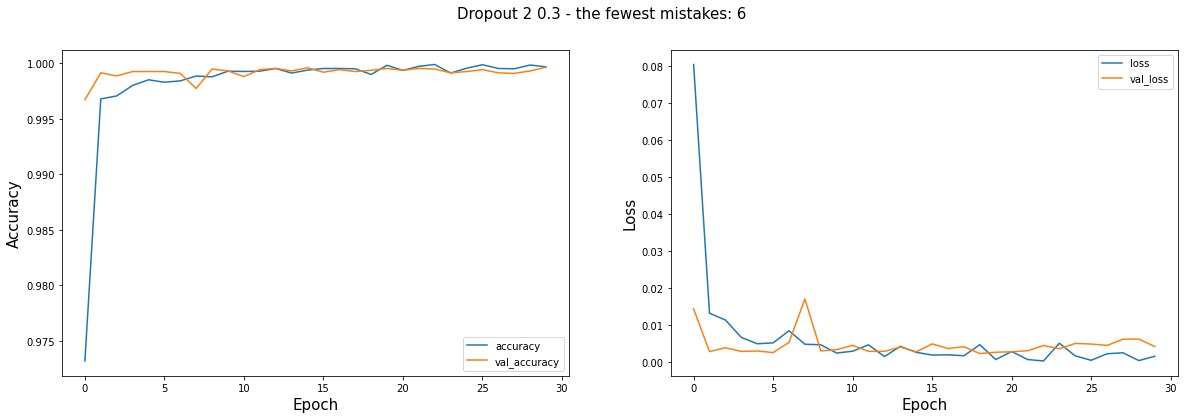

In [ ]:
plot_acc_loss(acc_d2_03, val_acc_d2_03, loss_d2_03, val_loss_d2_03, list(errors_d2_03).index(min(errors_d2_03)), min(errors_d2_03), 'Dropout 2 0.3 - the fewest mistakes')

## Global Max Pooling

In [ ]:
errors_gmp = np.load('/content/results/global_max_pooling/errors_cnt.npy')
acc_gmp = np.load('/content/results/global_max_pooling/history_acc.npy')
val_acc_gmp = np.load('/content/results/global_max_pooling/history_val_acc.npy')
loss_gmp = np.load('/content/results/global_max_pooling/history_loss.npy')
val_loss_gmp = np.load('/content/results/global_max_pooling/history_val_loss.npy')

Accuracy:  0.9997889  ±  0.0004383
Val_accuracy:  0.9995839  ±  0.0003134
Loss:  0.0009536  ±  0.0020128
Val_loss:  0.0025254  ±  0.0019878

Number of mistakes:
Average:  7.36
Median:  6.0
Standard deviation:  5.57


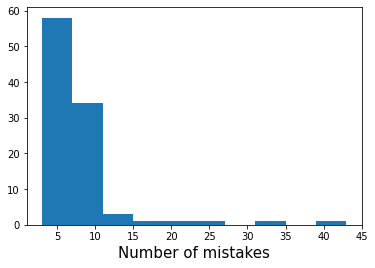

In [ ]:
metrics(errors_gmp, acc_gmp, val_acc_gmp, loss_gmp, val_loss_gmp)

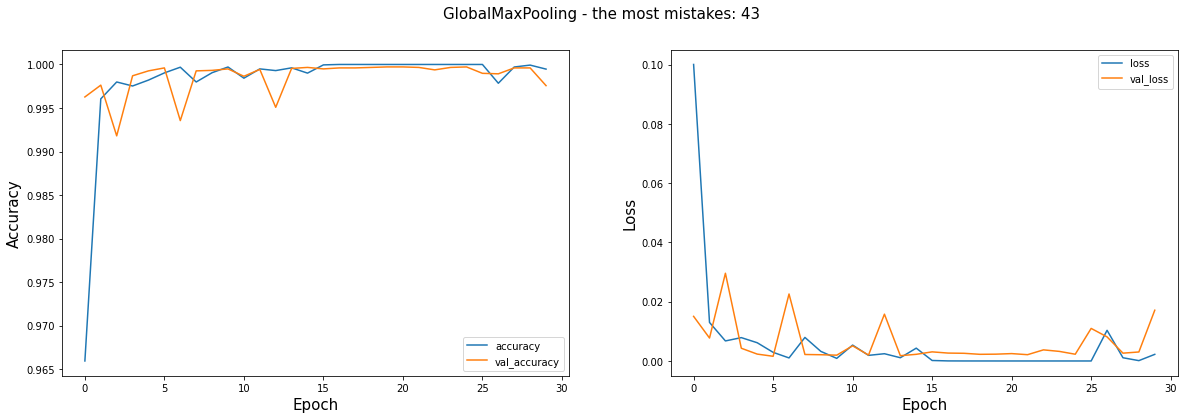

In [ ]:
plot_acc_loss(acc_gmp, val_acc_gmp, loss_gmp, val_loss_gmp, list(errors_gmp).index(max(errors_gmp)), max(errors_gmp), 'GlobalMaxPooling - the most mistakes')

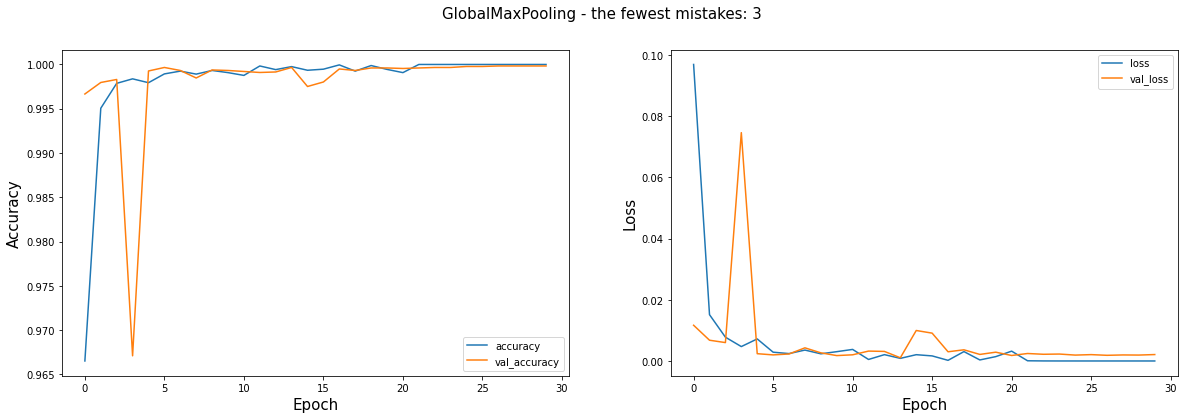

In [ ]:
plot_acc_loss(acc_gmp, val_acc_gmp, loss_gmp, val_loss_gmp, list(errors_gmp).index(min(errors_gmp)), min(errors_gmp), 'GlobalMaxPooling - the fewest mistakes')

## Horizontal flip

In [ ]:
errors_hflip = np.load('/content/results/horizontal_flip/errors_cnt.npy')
acc_hflip = np.load('/content/results/horizontal_flip/history_acc.npy')
val_acc_hflip = np.load('/content/results/horizontal_flip/history_val_acc.npy')
loss_hflip = np.load('/content/results/horizontal_flip/history_loss.npy')
val_loss_hflip = np.load('/content/results/horizontal_flip/history_val_loss.npy')

Accuracy:  0.9999335  ±  0.0001239
Val_accuracy:  0.9995912  ±  0.0002099
Loss:  0.0004336  ±  0.0008406
Val_loss:  0.0072036  ±  0.0031458

Number of mistakes:
Average:  7.23
Median:  6.5
Standard deviation:  3.61


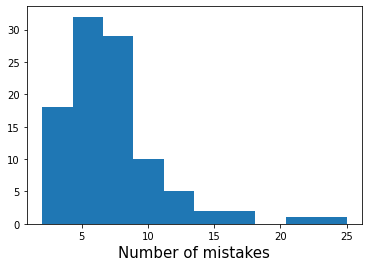

In [ ]:
metrics(errors_hflip, acc_hflip, val_acc_hflip, loss_hflip, val_loss_hflip)

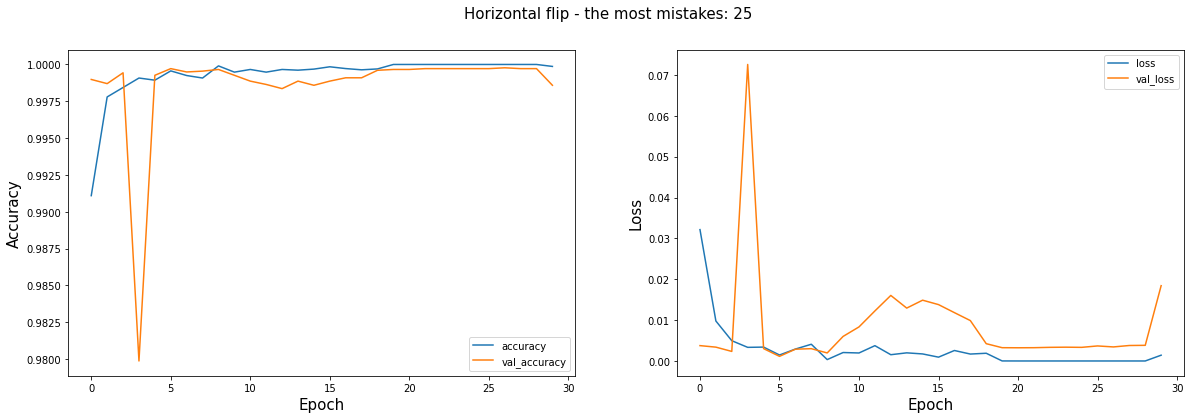

In [ ]:
plot_acc_loss(acc_hflip, val_acc_hflip, loss_hflip, val_loss_hflip, list(errors_hflip).index(max(errors_hflip)), max(errors_hflip), 'Horizontal flip - the most mistakes')

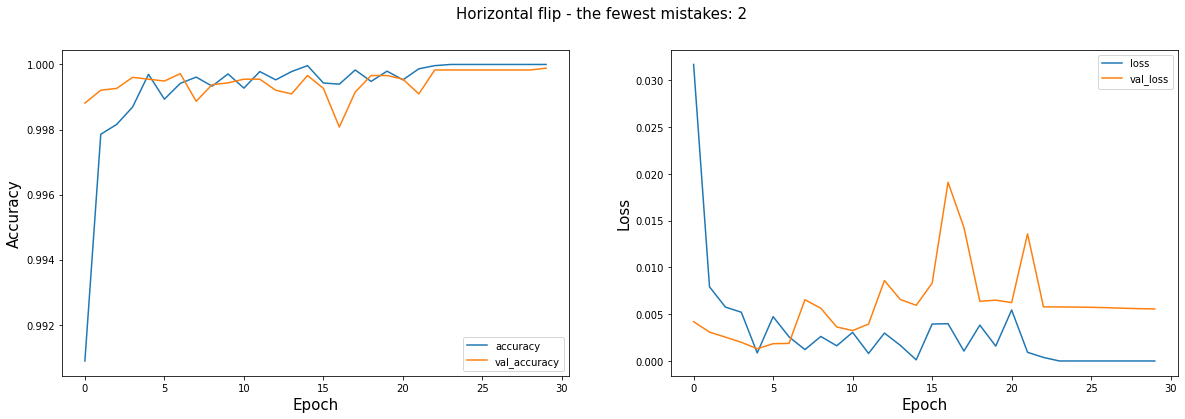

In [ ]:
plot_acc_loss(acc_hflip, val_acc_hflip, loss_hflip, val_loss_hflip, list(errors_hflip).index(min(errors_hflip)), min(errors_hflip), 'Horizontal flip - the fewest mistakes')

## Crop

In [ ]:
errors_crop = np.load('/content/results/crop/errors_cnt.npy')
acc_crop = np.load('/content/results/crop/history_acc.npy')
val_acc_crop = np.load('/content/results/crop/history_val_acc.npy')
loss_crop = np.load('/content/results/crop/history_loss.npy')
val_loss_crop = np.load('/content/results/crop/history_val_loss.npy')

Accuracy:  0.9996112  ±  0.0002311
Val_accuracy:  0.9992413  ±  0.0003935
Loss:  0.0023086  ±  0.0015884
Val_loss:  0.008782  ±  0.0056762

Number of mistakes:
Average:  13.42
Median:  12.0
Standard deviation:  6.93


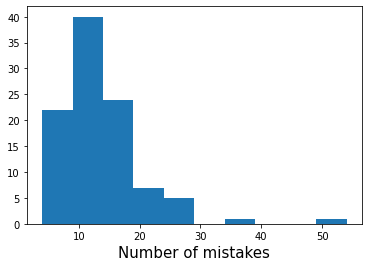

In [ ]:
metrics(errors_crop, acc_crop, val_acc_crop, loss_crop, val_loss_crop)

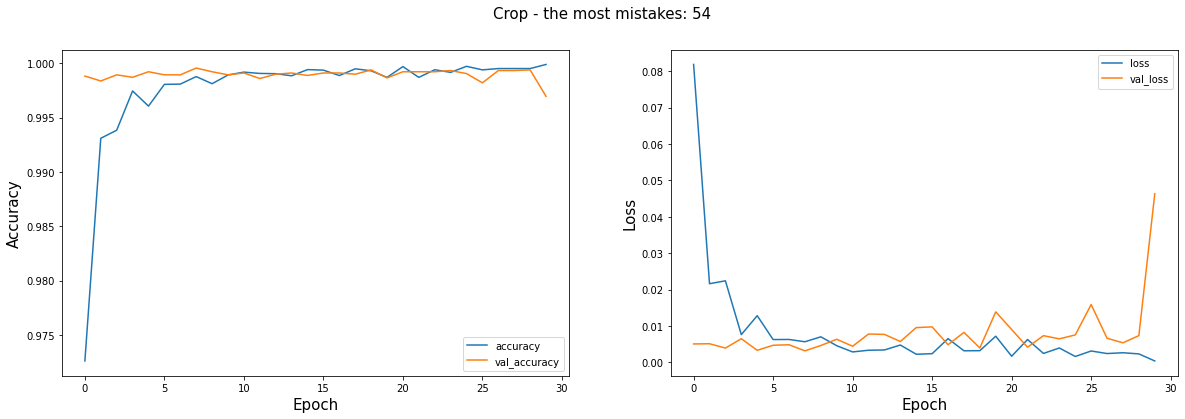

In [ ]:
plot_acc_loss(acc_crop, val_acc_crop, loss_crop, val_loss_crop, list(errors_crop).index(max(errors_crop)), max(errors_crop), 'Crop - the most mistakes')

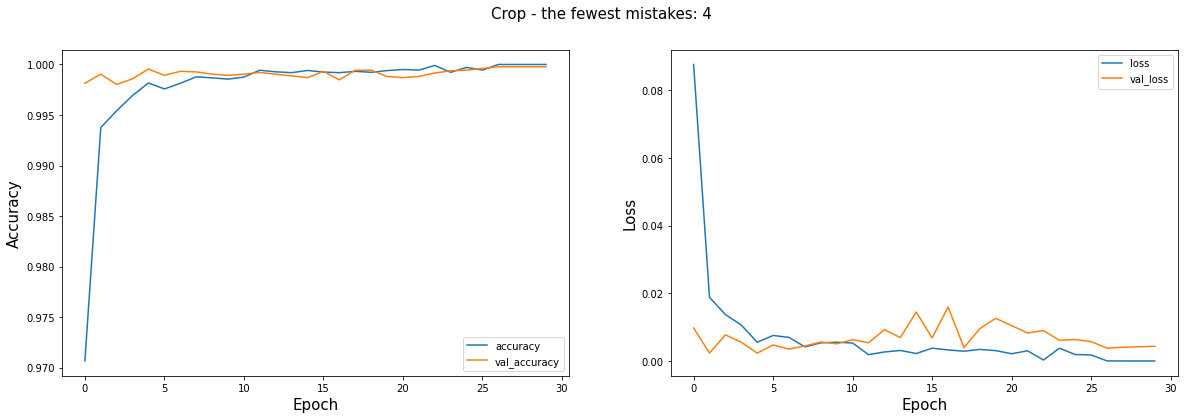

In [ ]:
plot_acc_loss(acc_crop, val_acc_crop, loss_crop, val_loss_crop, list(errors_crop).index(min(errors_crop)), min(errors_crop), 'Crop - the fewest mistakes')

## Rotation <= 30°

In [ ]:
errors_rot30 = np.load('/content/results/rotate_30/errors_cnt.npy')
acc_rot30 = np.load('/content/results/rotate_30/history_acc.npy')
val_acc_rot30 = np.load('/content/results/rotate_30/history_val_acc.npy')
loss_rot30 = np.load('/content/results/rotate_30/history_loss.npy')
val_loss_rot30 = np.load('/content/results/rotate_30/history_val_loss.npy')

Accuracy:  0.9998849  ±  0.0001835
Val_accuracy:  0.9995177  ±  0.0003847
Loss:  0.0006776  ±  0.0011423
Val_loss:  0.0074547  ±  0.0048919

Number of mistakes:
Average:  8.53
Median:  7.0
Standard deviation:  6.78


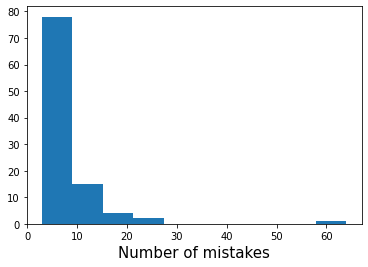

In [ ]:
metrics(errors_rot30, acc_rot30, val_acc_rot30, loss_rot30, val_loss_rot30)

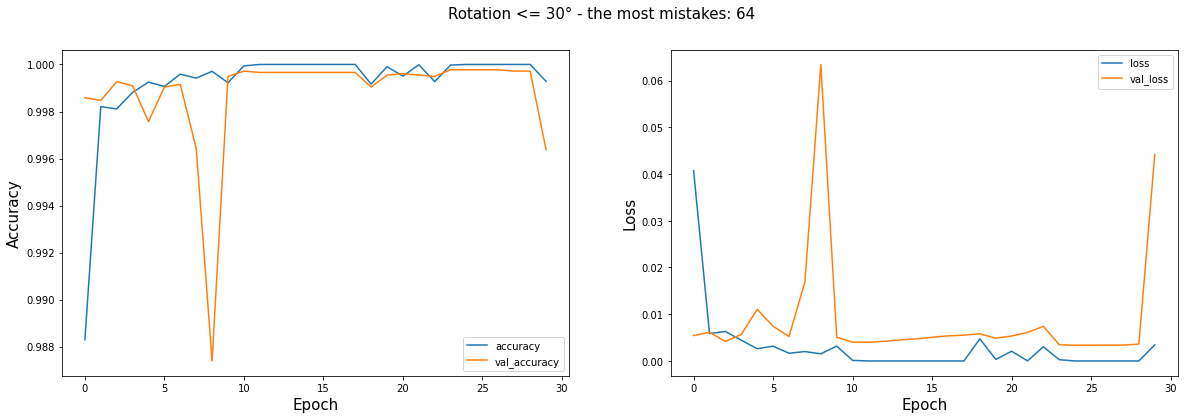

In [ ]:
plot_acc_loss(acc_rot30, val_acc_rot30, loss_rot30, val_loss_rot30, list(errors_rot30).index(max(errors_rot30)), max(errors_rot30), 'Rotation <= 30° - the most mistakes')

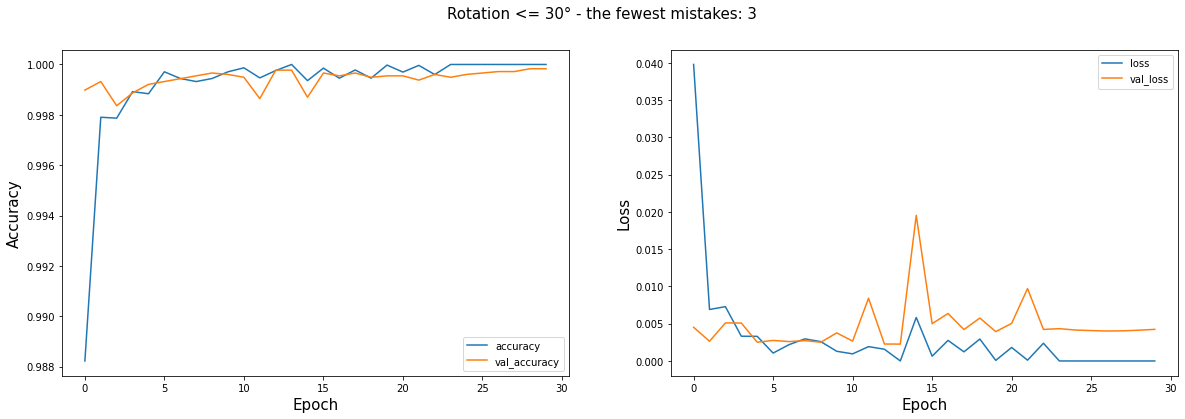

In [ ]:
plot_acc_loss(acc_rot30, val_acc_rot30, loss_rot30, val_loss_rot30, list(errors_rot30).index(min(errors_rot30)), min(errors_rot30), 'Rotation <= 30° - the fewest mistakes')

## Rotation <= 180°

In [ ]:
errors_rot180 = np.load('/content/results/rotate_180/errors_cnt.npy')
acc_rot180 = np.load('/content/results/rotate_180/history_acc.npy')
val_acc_rot180 = np.load('/content/results/rotate_180/history_val_acc.npy')
loss_rot180 = np.load('/content/results/rotate_180/history_loss.npy')
val_loss_rot180 = np.load('/content/results/rotate_180/history_val_loss.npy')

Accuracy:  0.9998438  ±  0.000217
Val_accuracy:  0.9995884  ±  0.0002413
Loss:  0.0010059  ±  0.0014896
Val_loss:  0.0053041  ±  0.0024886

Number of mistakes:
Average:  7.28
Median:  6.0
Standard deviation:  4.24


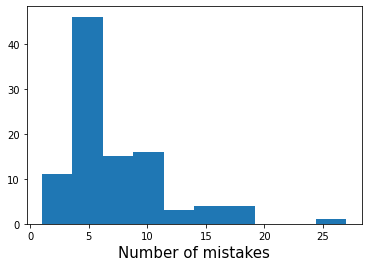

In [ ]:
metrics(errors_rot180, acc_rot180, val_acc_rot180, loss_rot180, val_loss_rot180)

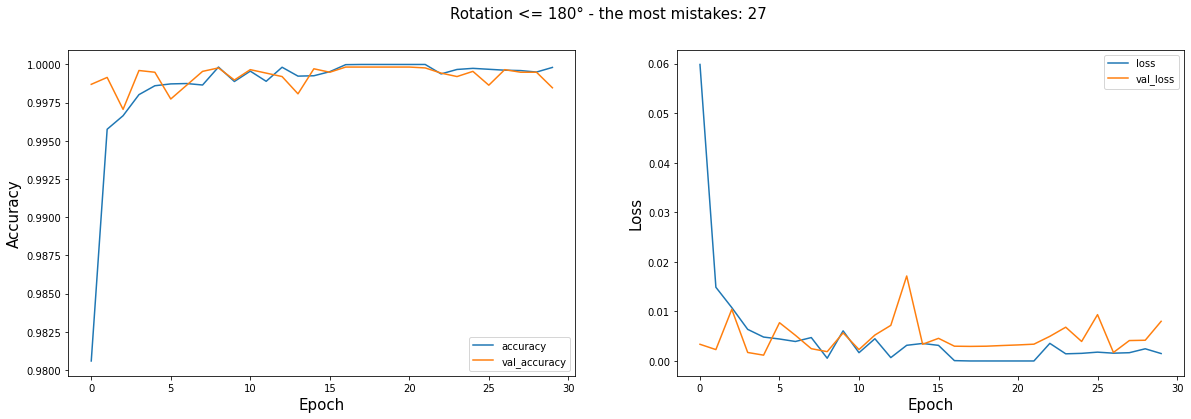

In [ ]:
plot_acc_loss(acc_rot180, val_acc_rot180, loss_rot180, val_loss_rot180, list(errors_rot180).index(max(errors_rot180)), max(errors_rot180), 'Rotation <= 180° - the most mistakes')

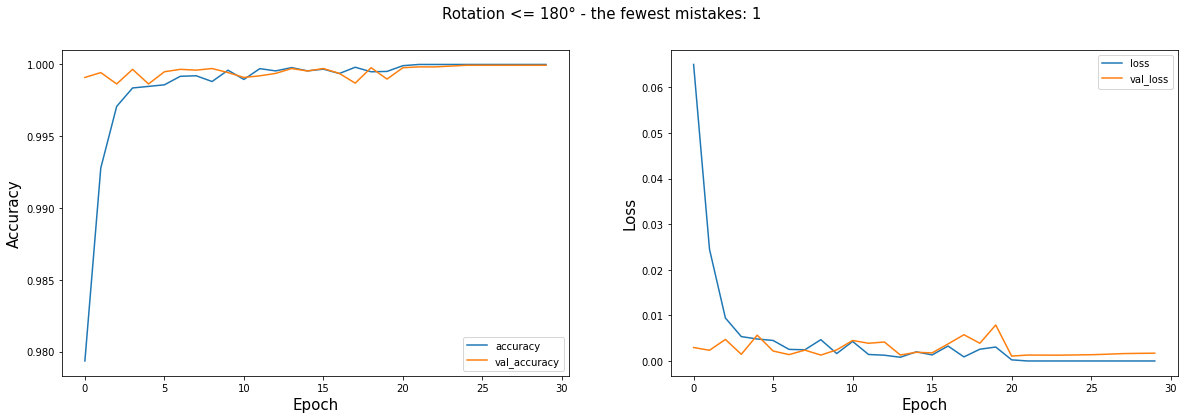

In [ ]:
plot_acc_loss(acc_rot180, val_acc_rot180, loss_rot180, val_loss_rot180, list(errors_rot180).index(min(errors_rot180)), min(errors_rot180), 'Rotation <= 180° - the fewest mistakes')

## BatchNormalization - before activation

In [ ]:
errors_bn_before = np.load('/content/results/batch_norm_before/errors_cnt.npy')
acc_bn_before = np.load('/content/results/batch_norm_before/history_acc.npy')
val_acc_bn_before = np.load('/content/results/batch_norm_before/history_val_acc.npy')
loss_bn_before = np.load('/content/results/batch_norm_before/history_loss.npy')
val_loss_bn_before = np.load('/content/results/batch_norm_before/history_val_loss.npy')

Accuracy:  0.9997029  ±  0.0002315
Val_accuracy:  0.988461  ±  0.0406434
Loss:  0.001826  ±  0.0016745
Val_loss:  0.2130383  ±  1.3051938

Number of mistakes:
Average:  204.09
Median:  13.0
Standard deviation:  722.48


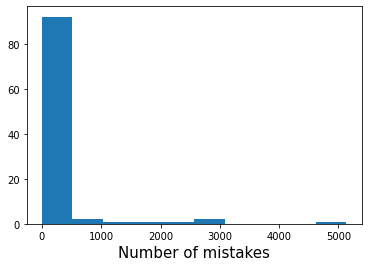

In [ ]:
metrics(errors_bn_before, acc_bn_before, val_acc_bn_before, loss_bn_before, val_loss_bn_before)

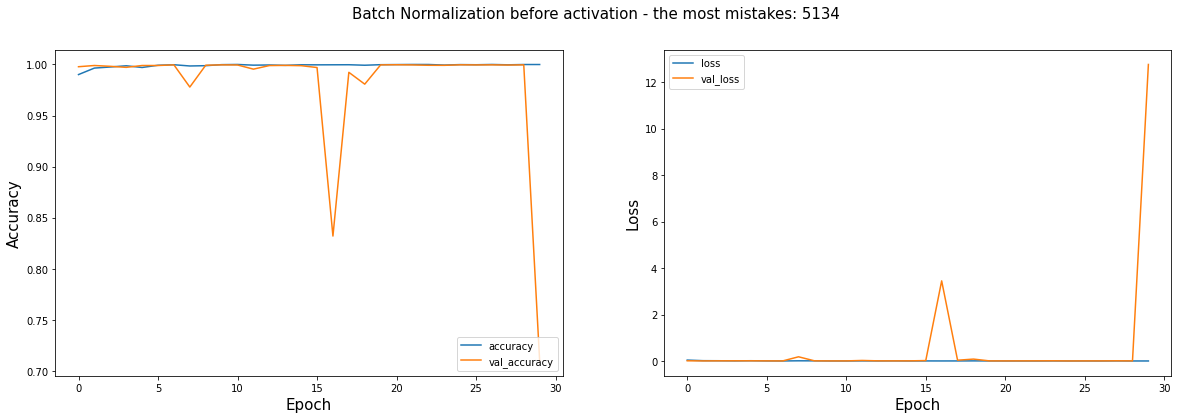

In [ ]:
plot_acc_loss(acc_bn_before, val_acc_bn_before, loss_bn_before, val_loss_bn_before, list(errors_bn_before).index(max(errors_bn_before)), max(errors_bn_before), 'Batch Normalization before activation - the most mistakes')

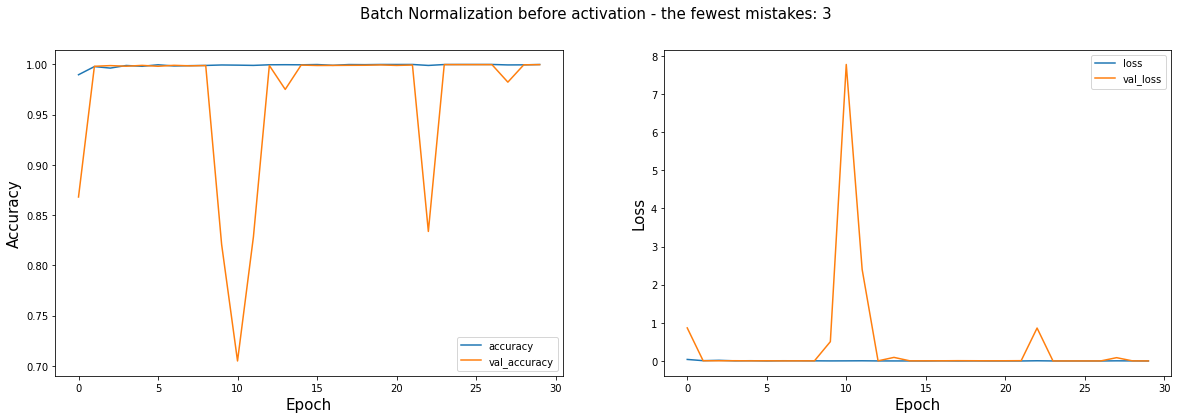

In [ ]:
plot_acc_loss(acc_bn_before, val_acc_bn_before, loss_bn_before, val_loss_bn_before, list(errors_bn_before).index(min(errors_bn_before)), min(errors_bn_before), 'Batch Normalization before activation - the fewest mistakes')

## Batch Normalization - before activation + batch_size = 128

In [ ]:
errors_bn_before_128 = np.load('/content/results/bn_before_batch_size_128/errors_cnt.npy')
acc_bn_before_128 = np.load('/content/results/bn_before_batch_size_128/history_acc.npy')
val_acc_bn_before_128 = np.load('/content/results/bn_before_batch_size_128/history_val_acc.npy')
loss_bn_before_128 = np.load('/content/results/bn_before_batch_size_128/history_loss.npy')
val_loss_bn_before_128 = np.load('/content/results/bn_before_batch_size_128/history_val_loss.npy')

Accuracy:  0.9999159  ±  0.000196
Val_accuracy:  0.99933  ±  0.0008858
Loss:  0.0003796  ±  0.0012257
Val_loss:  0.0036852  ±  0.0067345

Number of mistakes:
Average:  11.85
Median:  7.0
Standard deviation:  15.72


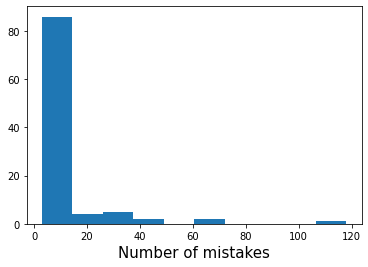

In [ ]:
metrics(errors_bn_before_128, acc_bn_before_128, val_acc_bn_before_128, loss_bn_before_128, val_loss_bn_before_128)

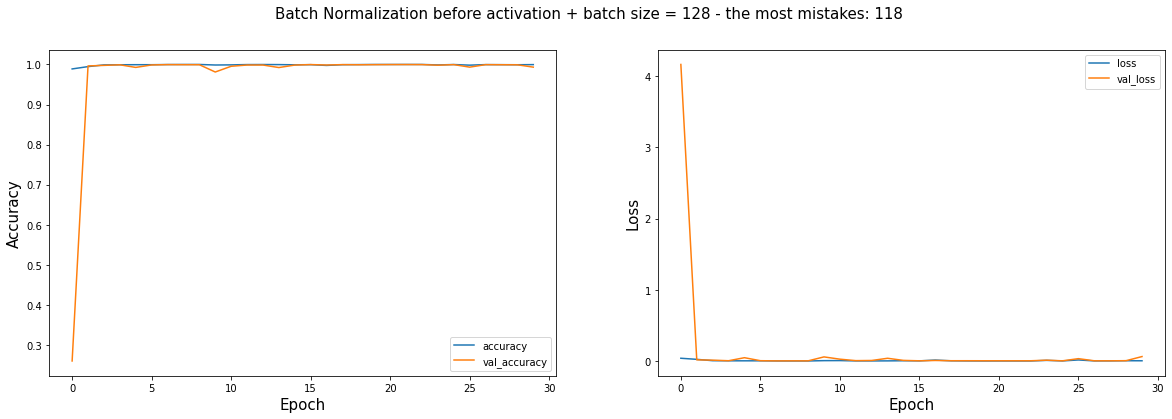

In [ ]:
plot_acc_loss(acc_bn_before_128, val_acc_bn_before_128, loss_bn_before_128, val_loss_bn_before_128, list(errors_bn_before_128).index(max(errors_bn_before_128)), max(errors_bn_before_128), 'Batch Normalization before activation + batch size = 128 - the most mistakes')

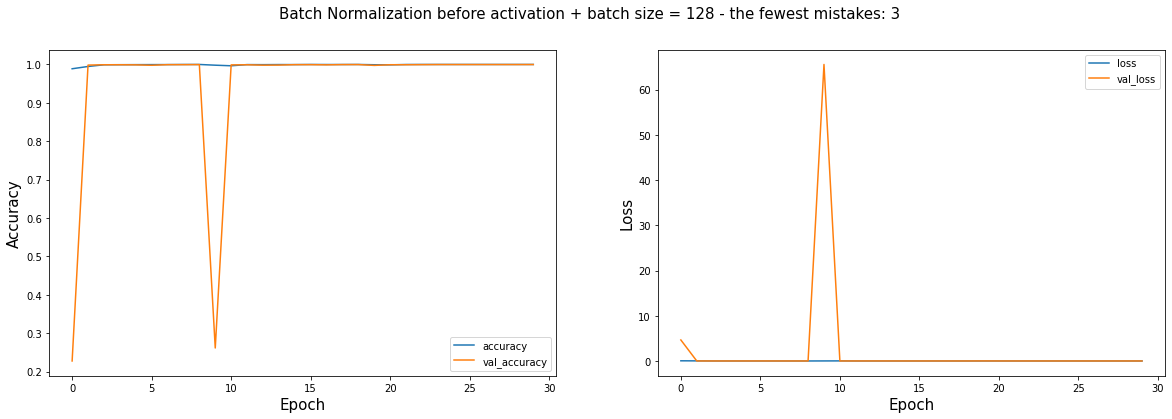

In [ ]:
plot_acc_loss(acc_bn_before_128, val_acc_bn_before_128, loss_bn_before_128, val_loss_bn_before_128, list(errors_bn_before_128).index(min(errors_bn_before_128)), min(errors_bn_before_128), 'Batch Normalization before activation + batch size = 128 - the fewest mistakes')

## BatchNormalization - after activation

In [ ]:
errors_bn_after = np.load('/content/results/batch_norm_after/errors_cnt.npy')
acc_bn_after = np.load('/content/results/batch_norm_after/history_acc.npy')
val_acc_bn_after = np.load('/content/results/batch_norm_after/history_val_acc.npy')
loss_bn_after = np.load('/content/results/batch_norm_after/history_loss.npy')
val_loss_bn_after = np.load('/content/results/batch_norm_after/history_val_loss.npy')

Accuracy:  0.9996433  ±  0.0002504
Val_accuracy:  0.9833618  ±  0.0544935
Loss:  0.0032612  ±  0.0028313
Val_loss:  0.6929003  ±  3.6258363

Number of mistakes:
Average:  294.28
Median:  14.0
Standard deviation:  968.68


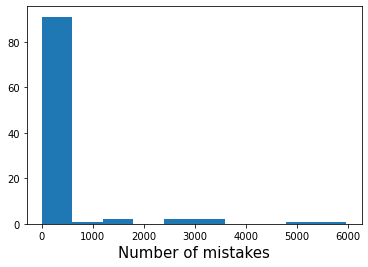

In [ ]:
metrics(errors_bn_after, acc_bn_after, val_acc_bn_after, loss_bn_after, val_loss_bn_after)

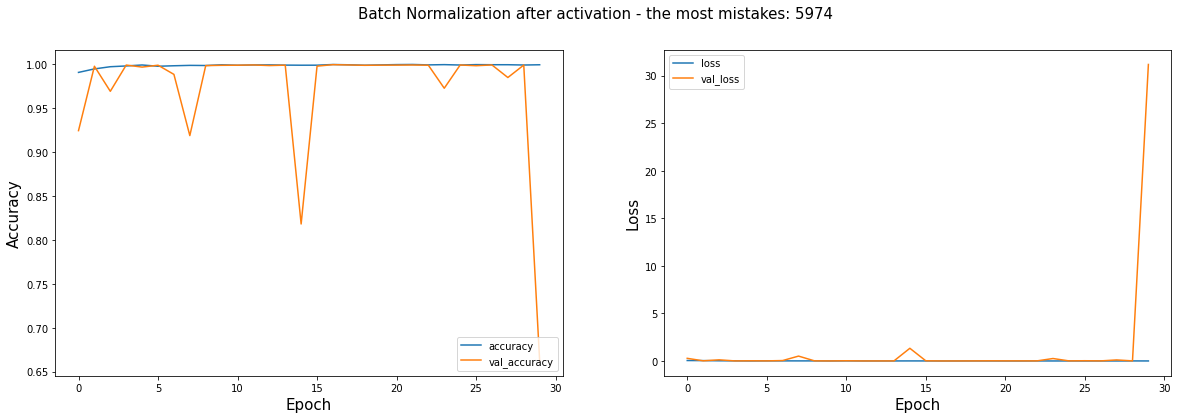

In [ ]:
plot_acc_loss(acc_bn_after, val_acc_bn_after, loss_bn_after, val_loss_bn_after, list(errors_bn_after).index(max(errors_bn_after)), max(errors_bn_after), 'Batch Normalization after activation - the most mistakes')

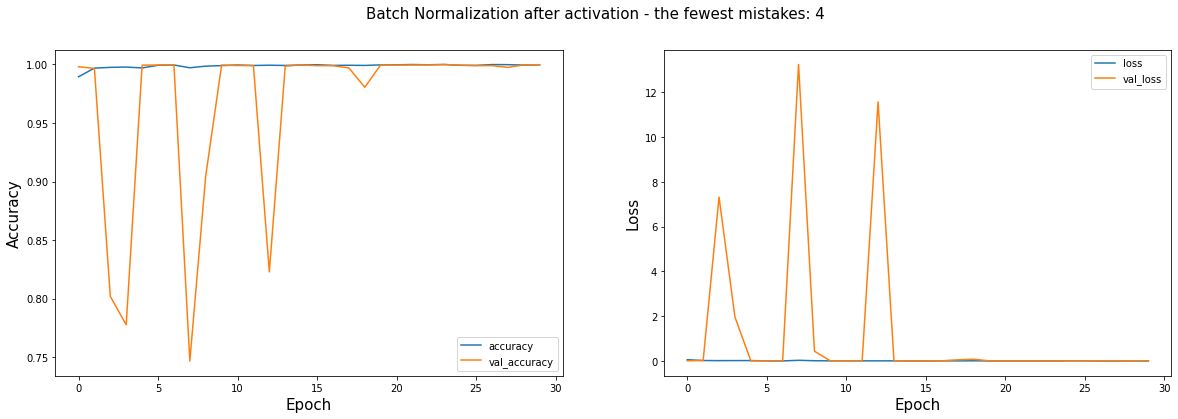

In [ ]:
plot_acc_loss(acc_bn_after, val_acc_bn_after, loss_bn_after, val_loss_bn_after, list(errors_bn_after).index(min(errors_bn_after)), min(errors_bn_after), 'Batch Normalization after activation - the fewest mistakes')

## Batch Normalization - after activation + batch_size = 128

In [ ]:
errors_bn_after_128 = np.load('/content/results/bn_after_batch_size_128/errors_cnt.npy')
acc_bn_after_128 = np.load('/content/results/bn_after_batch_size_128/history_acc.npy')
val_acc_bn_after_128 = np.load('/content/results/bn_after_batch_size_128/history_val_acc.npy')
loss_bn_after_128 = np.load('/content/results/bn_after_batch_size_128/history_loss.npy')
val_loss_bn_after_128 = np.load('/content/results/bn_after_batch_size_128/history_val_loss.npy')

Accuracy:  0.9998519  ±  0.0003437
Val_accuracy:  0.9900741  ±  0.0464971
Loss:  0.0014494  ±  0.004543
Val_loss:  0.6626561  ±  4.2175668

Number of mistakes:
Average:  175.56
Median:  8.0
Standard deviation:  826.54


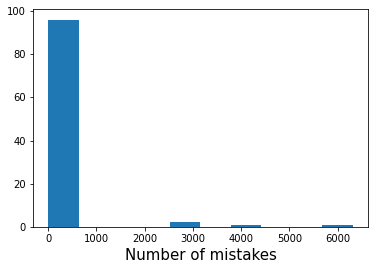

In [ ]:
metrics(errors_bn_after_128, acc_bn_after_128, val_acc_bn_after_128, loss_bn_after_128, val_loss_bn_after_128)

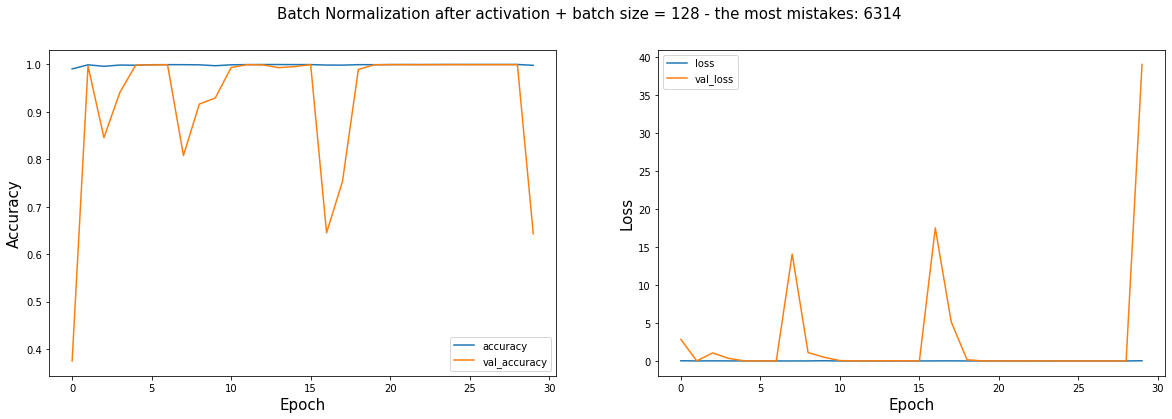

In [ ]:
plot_acc_loss(acc_bn_after_128, val_acc_bn_after_128, loss_bn_after_128, val_loss_bn_after_128, list(errors_bn_after_128).index(max(errors_bn_after_128)), max(errors_bn_after_128), 'Batch Normalization after activation + batch size = 128 - the most mistakes')

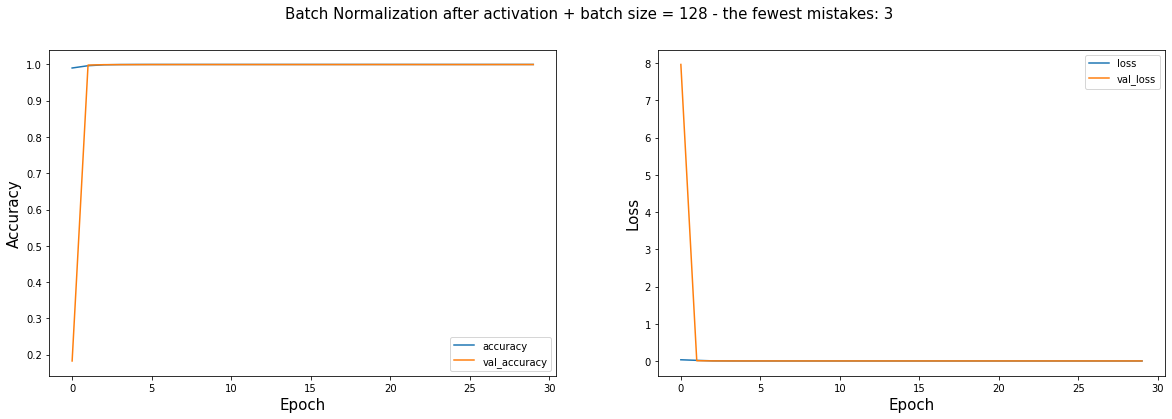

In [ ]:
plot_acc_loss(acc_bn_after_128, val_acc_bn_after_128, loss_bn_after_128, val_loss_bn_after_128, list(errors_bn_after_128).index(min(errors_bn_after_128)), min(errors_bn_after_128), 'Batch Normalization after activation + batch size = 128 - the fewest mistakes')

## GlobalMaxPooling + Horizontal flip

In [ ]:
errors_gmp_hflip = np.load('/content/results/gmp + hflip/errors_cnt.npy')
acc_gmp_hflip = np.load('/content/results/gmp + hflip/history_acc.npy')
val_acc_gmp_hflip = np.load('/content/results/gmp + hflip/history_val_acc.npy')
loss_gmp_hflip = np.load('/content/results/gmp + hflip/history_loss.npy')
val_loss_gmp_hflip = np.load('/content/results/gmp + hflip/history_val_loss.npy')

Accuracy:  0.9999078  ±  0.0001585
Val_accuracy:  0.999728  ±  0.0007073
Loss:  0.0004105  ±  0.0007188
Val_loss:  0.0012465  ±  0.0034794

Number of mistakes:
Average:  4.81
Median:  2.0
Standard deviation:  12.57


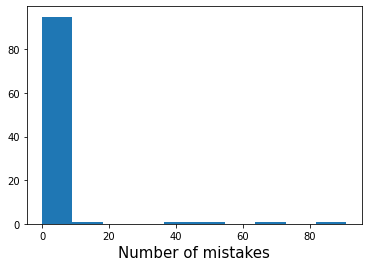

In [ ]:
metrics(errors_gmp_hflip, acc_gmp_hflip, val_acc_gmp_hflip, loss_gmp_hflip, val_loss_gmp_hflip)

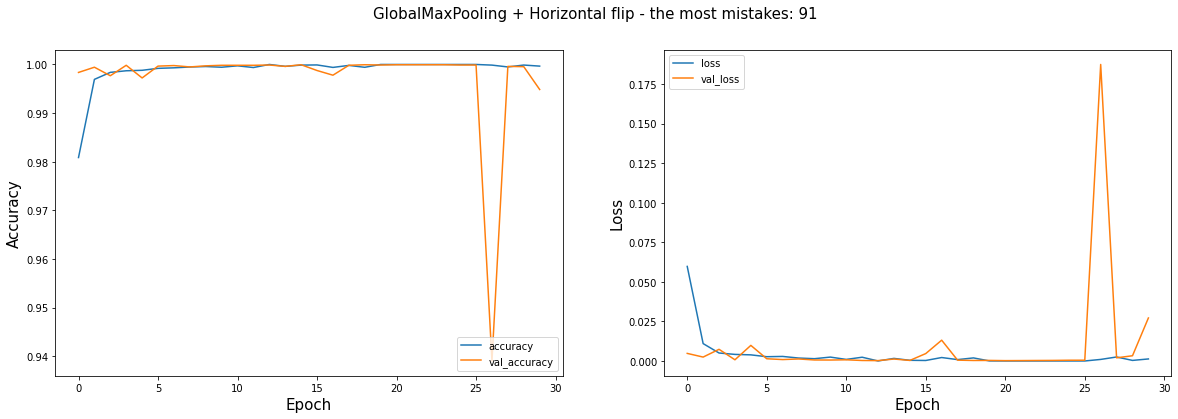

In [ ]:
plot_acc_loss(acc_gmp_hflip, val_acc_gmp_hflip, loss_gmp_hflip, val_loss_gmp_hflip, list(errors_gmp_hflip).index(max(errors_gmp_hflip)), max(errors_gmp_hflip), 'GlobalMaxPooling + Horizontal flip - the most mistakes')

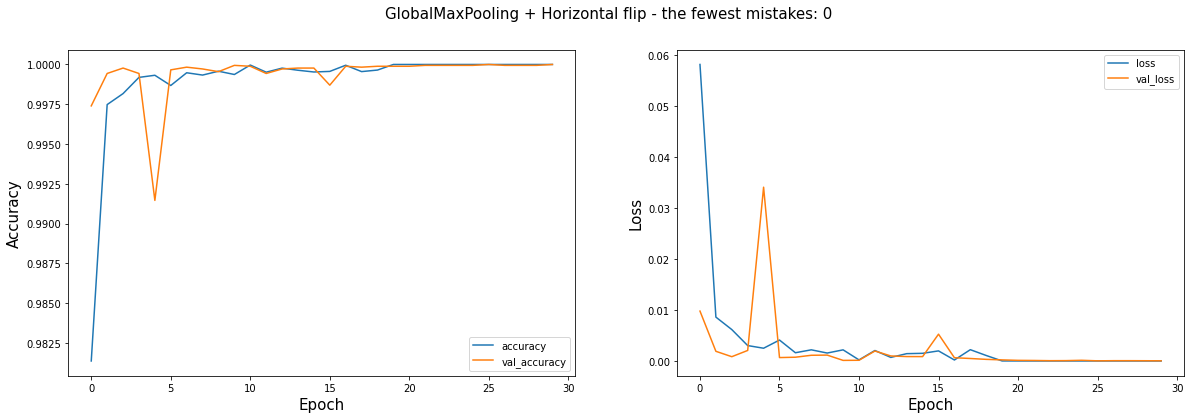

In [ ]:
plot_acc_loss(acc_gmp_hflip, val_acc_gmp_hflip, loss_gmp_hflip, val_loss_gmp_hflip, list(errors_gmp_hflip).index(min(errors_gmp_hflip)), min(errors_gmp_hflip), 'GlobalMaxPooling + Horizontal flip - the fewest mistakes')

## GlobalMaxPooling + Horizontal flip + Rotation <= 180°

In [ ]:
errors_gmp_hflip_rotate180 = np.load('/content/results/gmp + hflip + rotate180/errors_cnt.npy')
acc_gmp_hflip_rotate180 = np.load('/content/results/gmp + hflip + rotate180/history_acc.npy')
val_acc_gmp_hflip_rotate180 = np.load('/content/results/gmp + hflip + rotate180/history_val_acc.npy')
loss_gmp_hflip_rotate180 = np.load('/content/results/gmp + hflip + rotate180/history_loss.npy')
val_loss_gmp_hflip_rotate180 = np.load('/content/results/gmp + hflip + rotate180/history_val_loss.npy')

Accuracy:  0.9997843  ±  6.24e-05
Val_accuracy:  0.9998473  ±  9.1e-05
Loss:  0.0009948  ±  0.0003596
Val_loss:  0.0013188  ±  0.0008222

Number of mistakes:
Average:  2.7
Median:  2.0
Standard deviation:  1.41


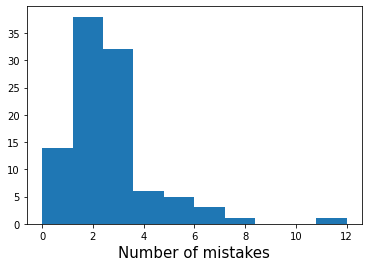

In [ ]:
metrics(errors_gmp_hflip_rotate180, acc_gmp_hflip_rotate180, val_acc_gmp_hflip_rotate180, loss_gmp_hflip_rotate180, val_loss_gmp_hflip_rotate180)

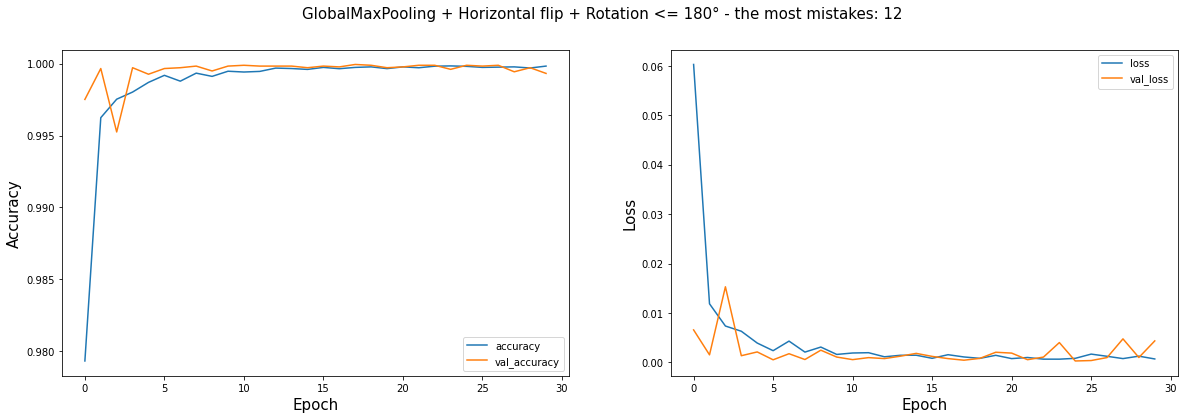

In [ ]:
plot_acc_loss(acc_gmp_hflip_rotate180, val_acc_gmp_hflip_rotate180, loss_gmp_hflip_rotate180, val_loss_gmp_hflip_rotate180, list(errors_gmp_hflip_rotate180).index(max(errors_gmp_hflip_rotate180)), max(errors_gmp_hflip_rotate180), 'GlobalMaxPooling + Horizontal flip + Rotation <= 180° - the most mistakes')

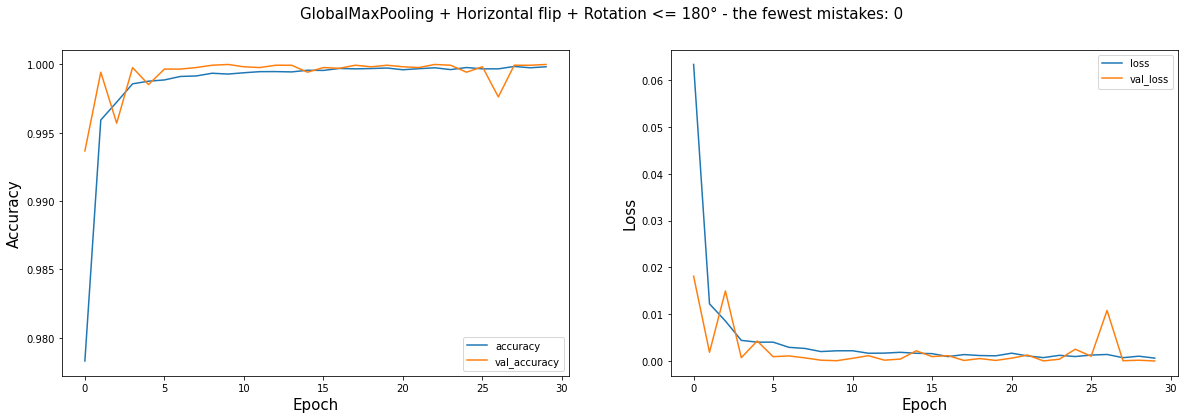

In [ ]:
plot_acc_loss(acc_gmp_hflip_rotate180, val_acc_gmp_hflip_rotate180, loss_gmp_hflip_rotate180, val_loss_gmp_hflip_rotate180, list(errors_gmp_hflip_rotate180).index(min(errors_gmp_hflip_rotate180)), min(errors_gmp_hflip_rotate180), 'GlobalMaxPooling + Horizontal flip + Rotation <= 180° - the fewest mistakes')

## GlobalMaxPooling + Horizontal flip + Rotation <= 180° + Batch Normalization before activation + batch size = 128

In [ ]:
errors_gmp_hflip_rot180_bn128 = np.load('/content/results/gmp+hflip+rot180+bn_before+bs128/errors_cnt.npy')
acc_gmp_hflip_rot180_bn128 = np.load('/content/results/gmp+hflip+rot180+bn_before+bs128/history_acc.npy')
val_acc_gmp_hflip_rot180_bn128 = np.load('/content/results/gmp+hflip+rot180+bn_before+bs128/history_val_acc.npy')
loss_gmp_hflip_rot180_bn128 = np.load('/content/results/gmp+hflip+rot180+bn_before+bs128/history_loss.npy')
val_loss_gmp_hflip_rot180_bn128 = np.load('/content/results/gmp+hflip+rot180+bn_before+bs128/history_val_loss.npy')

Accuracy:  0.9999208  ±  7.49e-05
Val_accuracy:  0.9979731  ±  0.0135249
Loss:  0.0002738  ±  0.0002683
Val_loss:  0.0069854  ±  0.0474016

Number of mistakes:
Average:  35.85
Median:  1.0
Standard deviation:  240.42


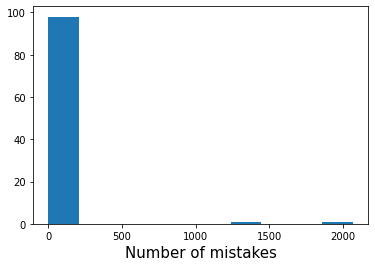

In [ ]:
metrics(errors_gmp_hflip_rot180_bn128, acc_gmp_hflip_rot180_bn128, val_acc_gmp_hflip_rot180_bn128, loss_gmp_hflip_rot180_bn128, val_loss_gmp_hflip_rot180_bn128)

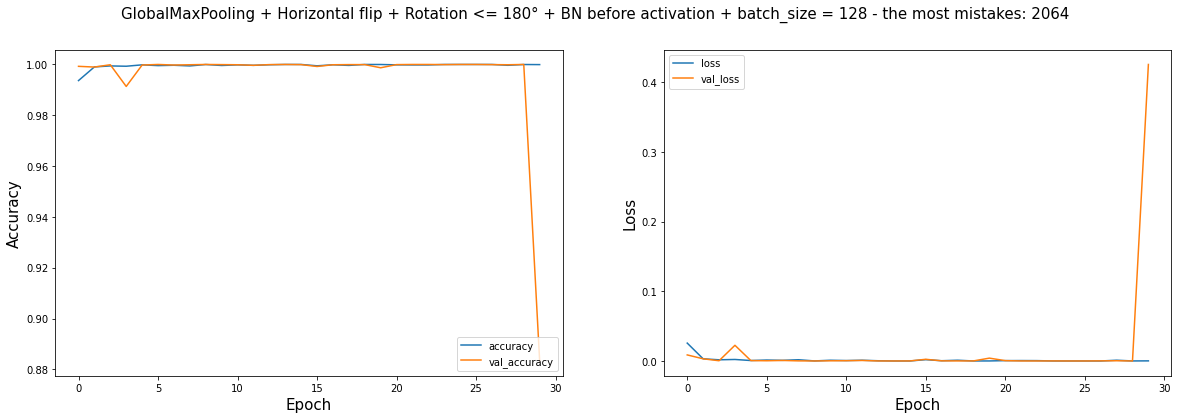

In [ ]:
plot_acc_loss(acc_gmp_hflip_rot180_bn128, val_acc_gmp_hflip_rot180_bn128, loss_gmp_hflip_rot180_bn128, val_loss_gmp_hflip_rot180_bn128, list(errors_gmp_hflip_rot180_bn128).index(max(errors_gmp_hflip_rot180_bn128)), max(errors_gmp_hflip_rot180_bn128), 'GlobalMaxPooling + Horizontal flip + Rotation <= 180° + BN before activation + batch_size = 128 - the most mistakes')

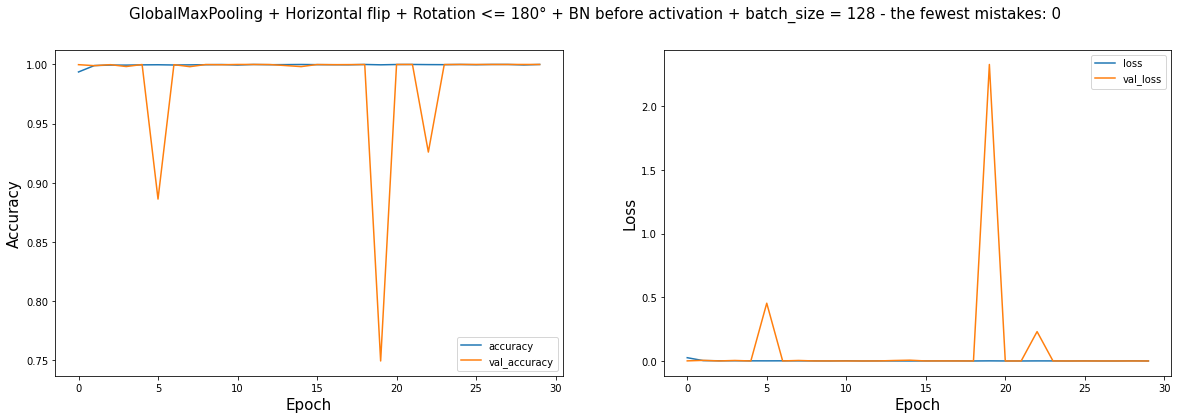

In [ ]:
plot_acc_loss(acc_gmp_hflip_rot180_bn128, val_acc_gmp_hflip_rot180_bn128, loss_gmp_hflip_rot180_bn128, val_loss_gmp_hflip_rot180_bn128, list(errors_gmp_hflip_rot180_bn128).index(min(errors_gmp_hflip_rot180_bn128)), min(errors_gmp_hflip_rot180_bn128), 'GlobalMaxPooling + Horizontal flip + Rotation <= 180° + BN before activation + batch_size = 128 - the fewest mistakes')

## Violin plots

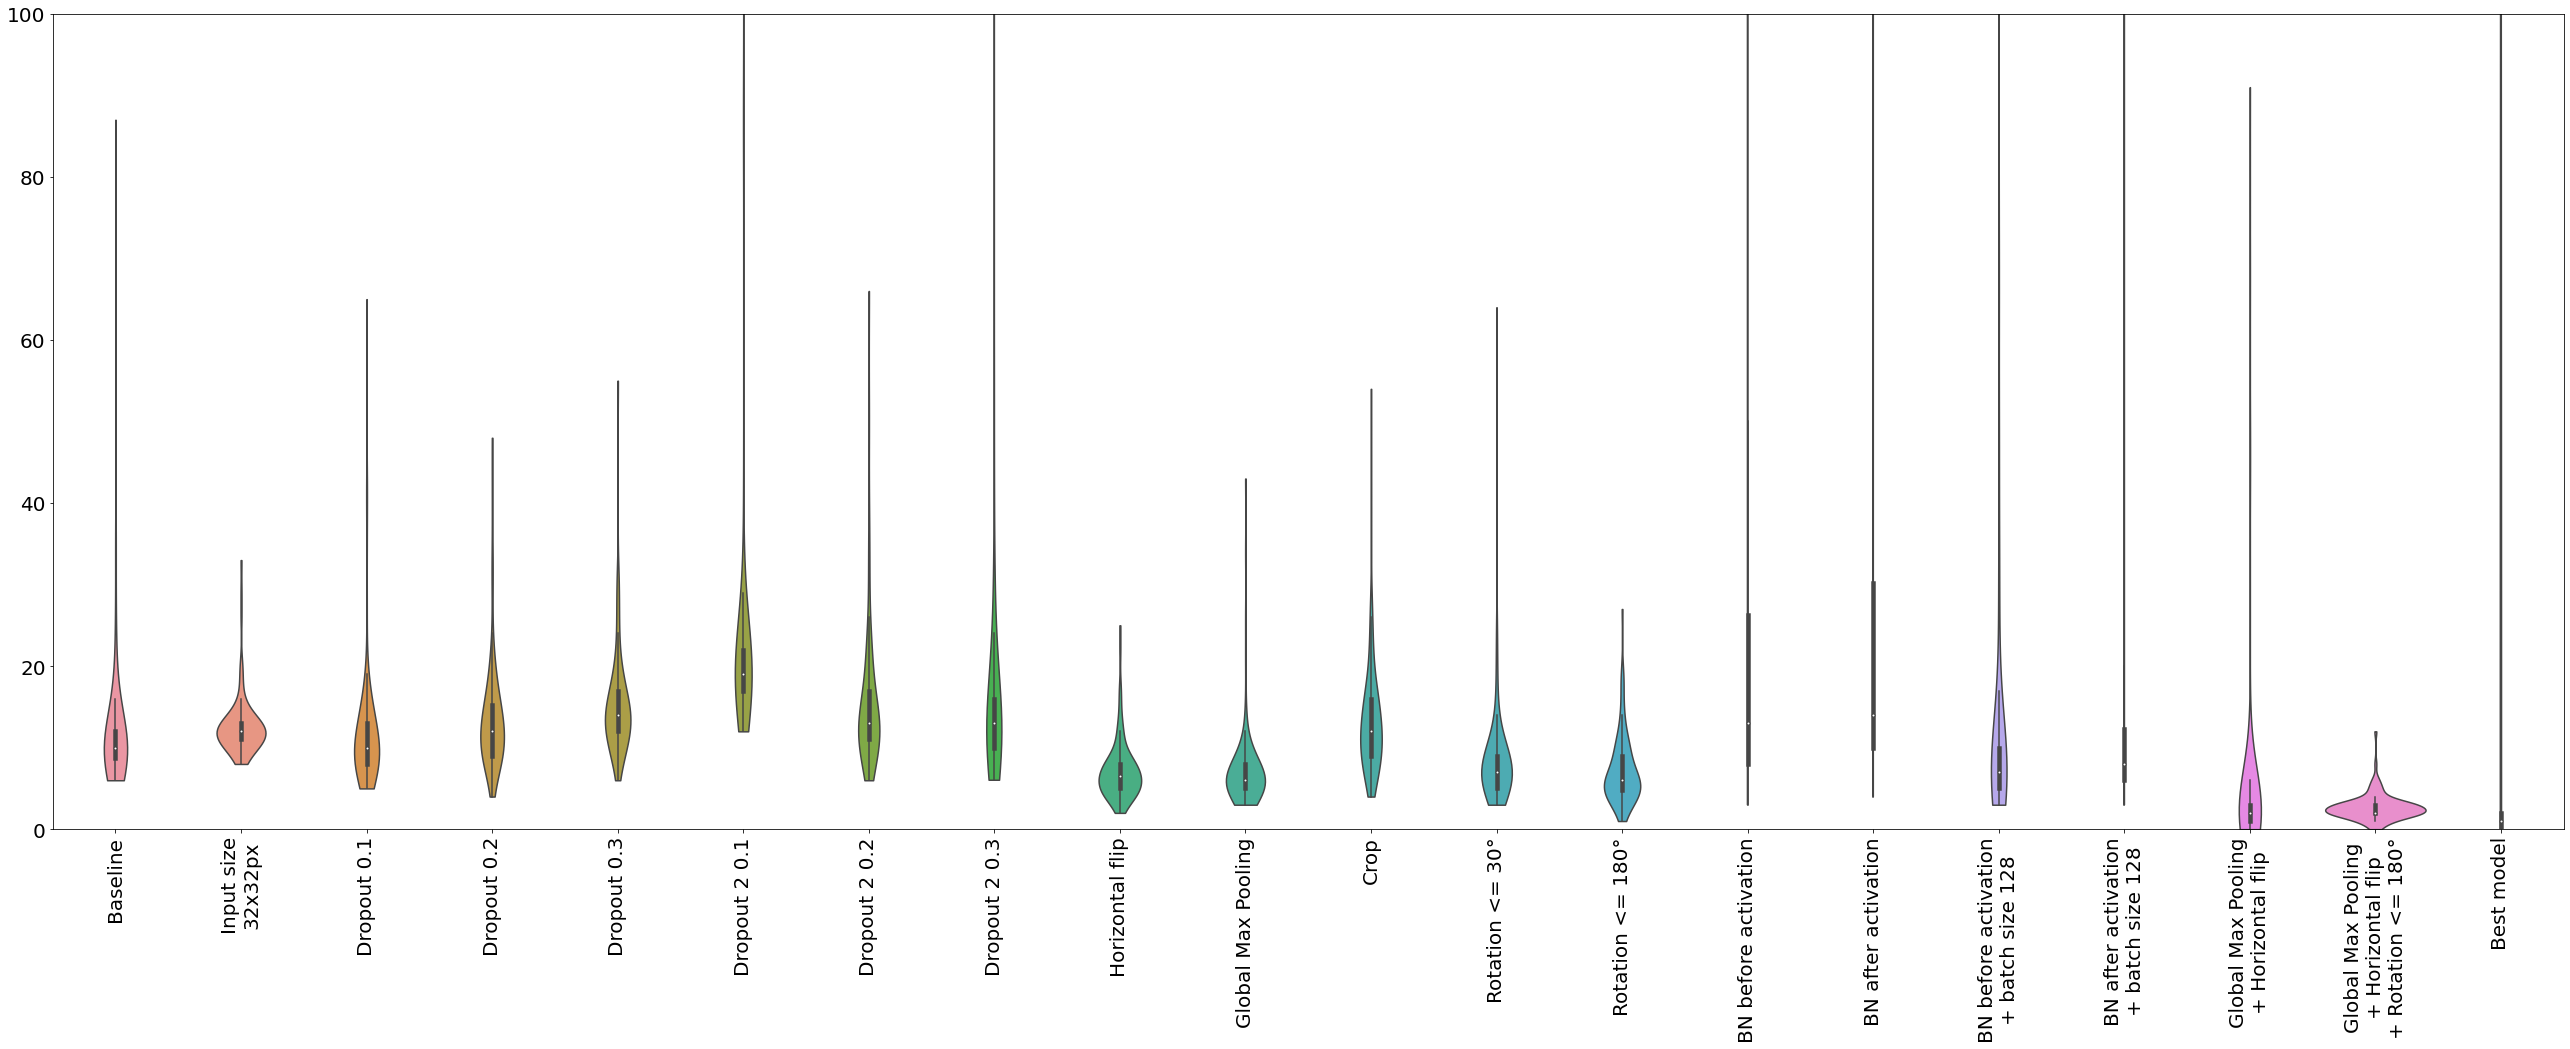

In [ ]:
errors_dict = {'Baseline': errors_base, 'Input size\n32x32px': errors_32, 'Dropout 0.1': errors_d01, 'Dropout 0.2': errors_d02,
               'Dropout 0.3': errors_d03, 'Dropout 2 0.1': errors_d2_01, 'Dropout 2 0.2': errors_d2_02, 'Dropout 2 0.3': errors_d2_03,
               'Horizontal flip': errors_hflip, 'Global Max Pooling': errors_gmp, 'Crop': errors_crop, 
               'Rotation <= 30°': errors_rot30, 'Rotation <= 180°': errors_rot180, 'BN before activation': errors_bn_before, 
               'BN after activation': errors_bn_after,  'BN before activation\n+ batch size 128': errors_bn_before_128, 
               'BN after activation\n+ batch size 128': errors_bn_after_128, 'Global Max Pooling\n+ Horizontal flip': errors_gmp_hflip,
               'Global Max Pooling\n+ Horizontal flip\n+ Rotation <= 180°': errors_gmp_hflip_rotate180,
               'Best model': errors_gmp_hflip_rot180_bn128}

df = pd.DataFrame(errors_dict)

plt.figure(figsize=(45,15))
sns.violinplot(data=df, cut=0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,100)
plt.xticks(rotation=90);

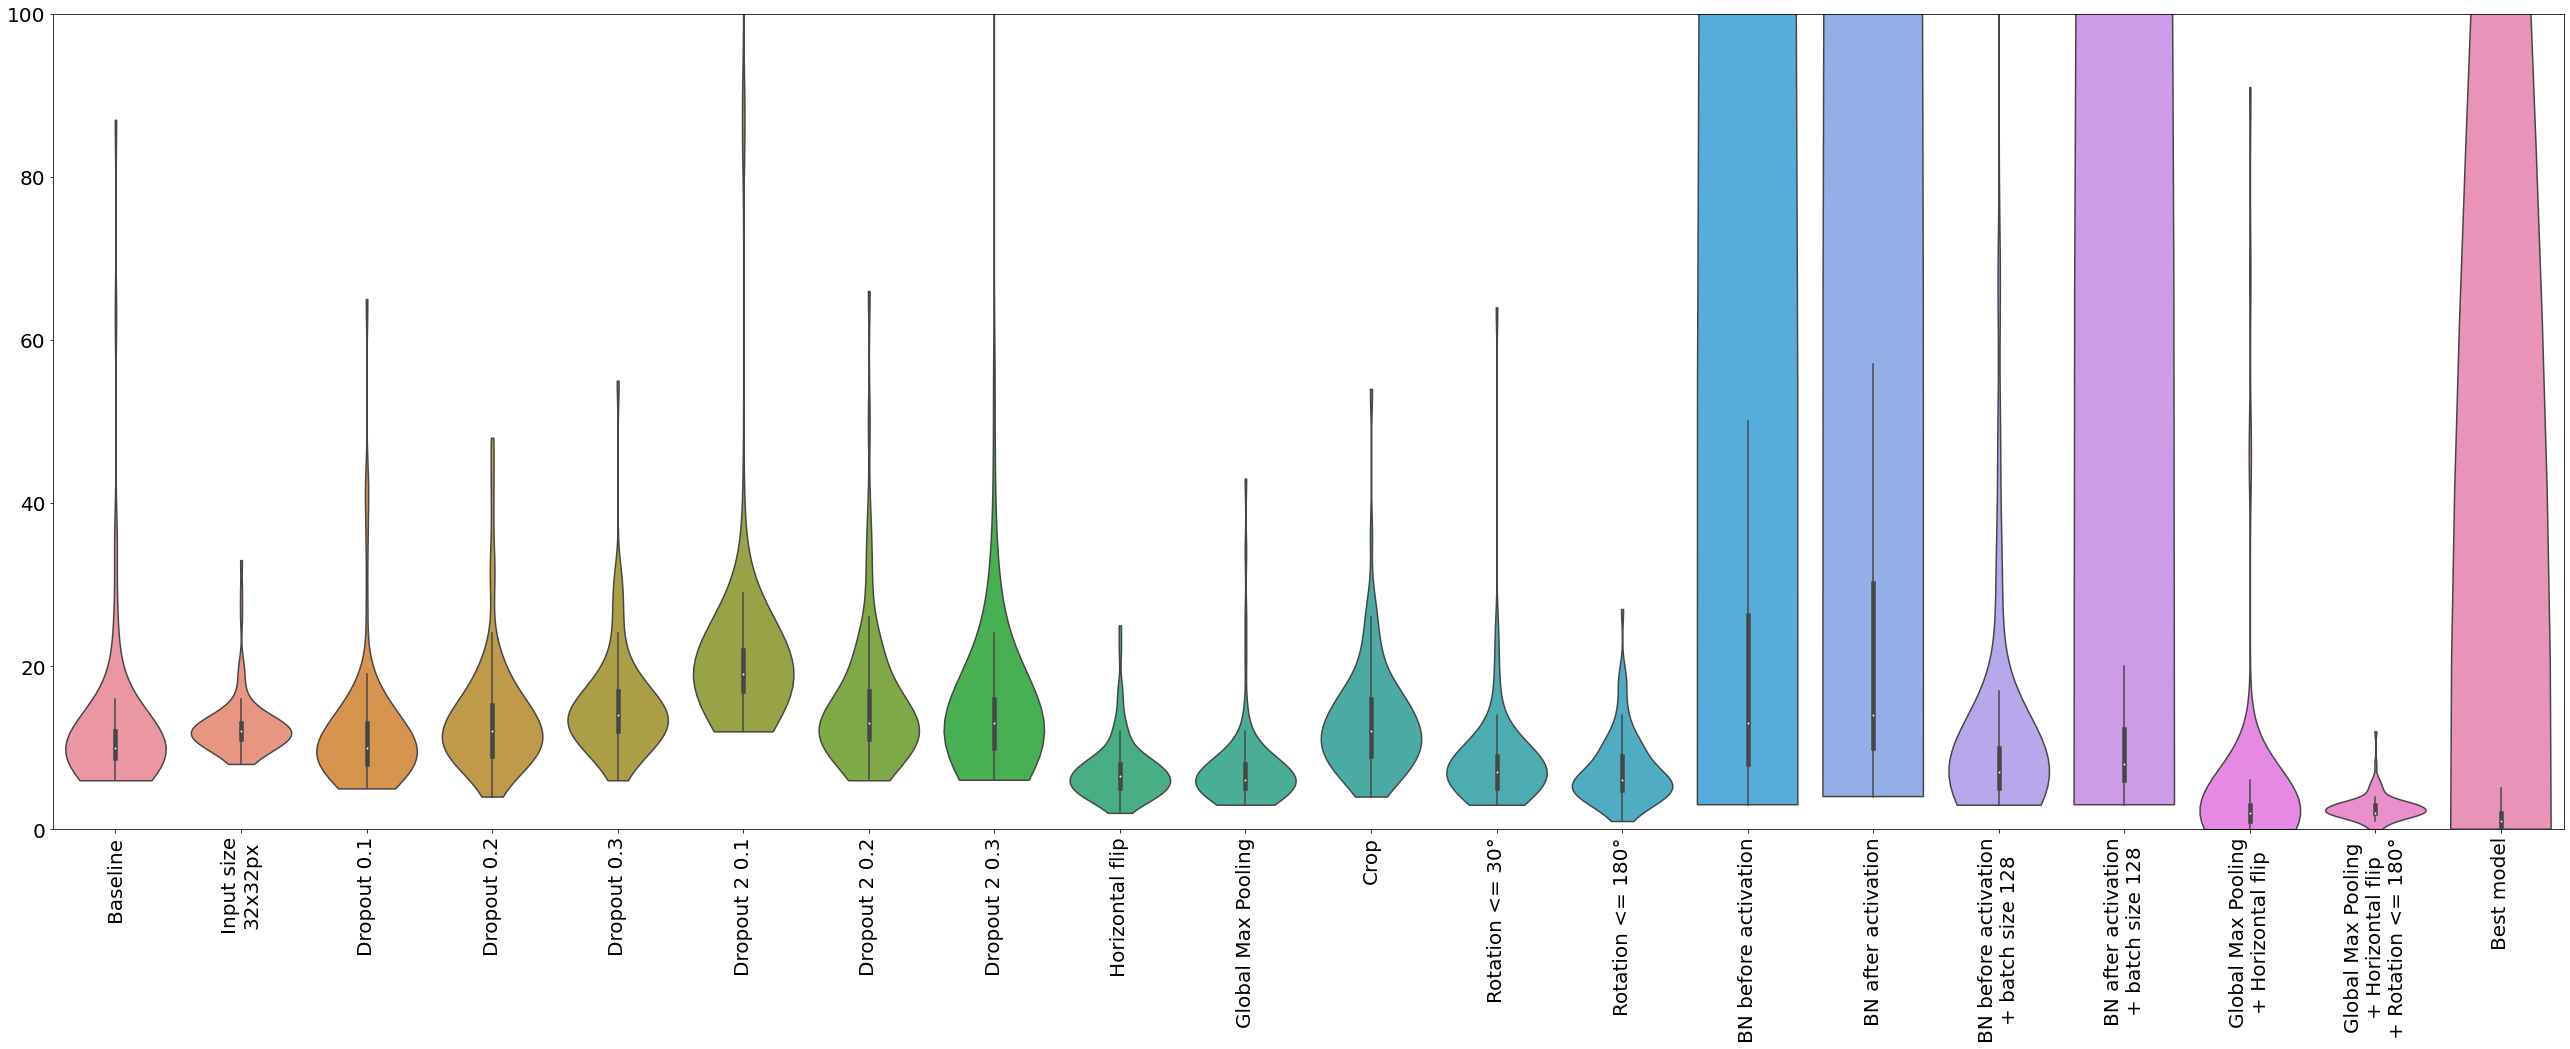

In [ ]:
plt.figure(figsize=(45,15))
sns.violinplot(data=df, cut=0, scale='width')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,100)
plt.xticks(rotation=90);

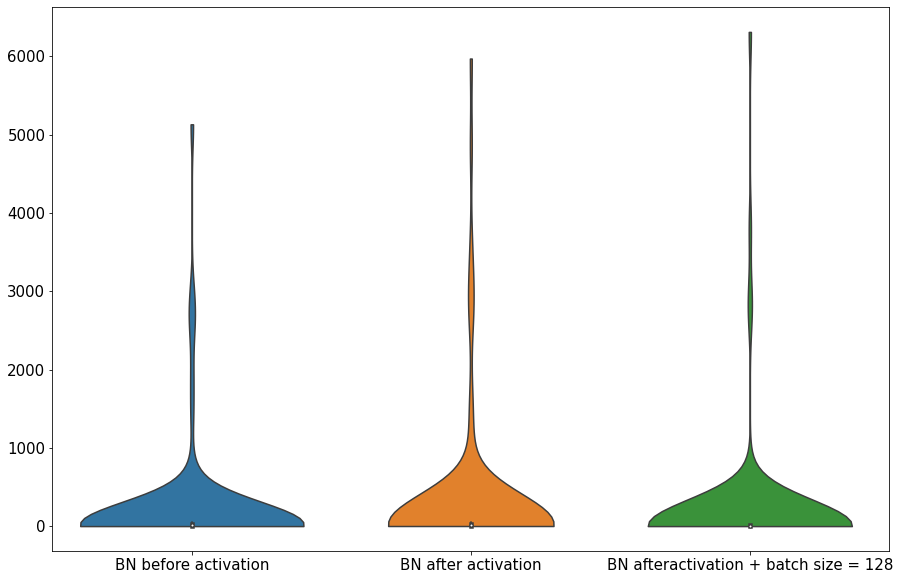

In [ ]:
bn_dict = {'BN before activation': errors_bn_before, 'BN after activation': errors_bn_after, 
           'BN afteractivation + batch size = 128': errors_bn_after_128}
df_bn = pd.DataFrame(bn_dict)

plt.figure(figsize=(15,10))
sns.violinplot(data=df_bn, cut=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

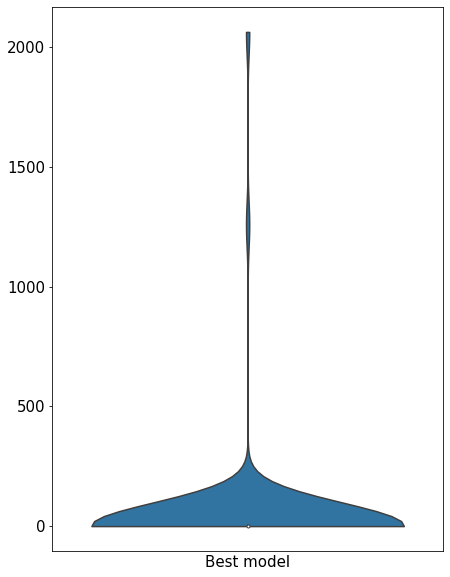

In [ ]:
plt.figure(figsize=(7,10))
sns.violinplot(data=errors_gmp_hflip_rot180_bn128, cut=0)
plt.xlabel('Best model', fontsize=15)
plt.xticks([])
plt.yticks(fontsize=15);

## ROC and PR curves

In [ ]:
def plot_roc_curves(model, X_test, y_test):

  labels = ['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']

  y_pred = model.predict(X_test)

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  for i in range(6):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([-0.05, 1.0])
  plt.ylim([0.0, 1.05])

  plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (AUC = {0:0.4f})'.format(roc_auc["micro"]))
  
  for i in range(6):
    plt.plot(fpr[i], tpr[i], label='{0} (AUC = {1:0.4f})'.format(labels[i], roc_auc[i]))

  plt.legend(fontsize=15)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlabel('False Positive Rate', fontsize=15)
  plt.ylabel('True Positive Rate', fontsize=15)

In [ ]:
def roc_models(models, X_test, y_test, labels):
  roc_auc = dict()
  fpr = dict()
  tpr = dict()

  for i, model in enumerate(models):
    y_pred = model.predict(X_test)

    fpr[i], tpr[i], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc[i] = auc(fpr[i], tpr[i])
  
    plt.plot(fpr[i], tpr[i], label='{0} (AUC = {1:0.4f})'.format(labels[i], roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([-0.05, 1.0])
  plt.ylim([0.0, 1.05])

  plt.legend(fontsize=15)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlabel('False Positive Rate', fontsize=15)
  plt.ylabel('True Positive Rate', fontsize=15)

In [ ]:
def plot_pr_curves(model, X_test, y_test):

  labels = ['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']

  y_pred = model.predict(X_test)

  precision = dict()
  recall = dict()
  avg_precision = dict()

  for i in range(6):
      precision[i], recall[i], _ = precision_recall_curve(y_test[:,i], y_pred[:,i])
      avg_precision[i] = average_precision_score(y_test[:,i], y_pred[:,i])

  precision['micro'], recall['micro'], _ = precision_recall_curve(y_test.ravel(), y_pred.ravel())
  avg_precision["micro"] = average_precision_score(y_test.ravel(), y_pred.ravel())

  plt.xlim([0.0, 1.00])
  plt.ylim([0.0, 1.05])

  plt.plot(recall['micro'], precision['micro'], label='micro-average PR curve (AP = {0:0.4f})'.format(avg_precision['micro']))
  
  for i in range(6):
    plt.plot(recall[i], precision[i], label='{0} (AP = {1:0.4f})'.format(labels[i], avg_precision[i]))

  plt.legend(loc=3, fontsize=15)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlabel('Recall', fontsize=15)
  plt.ylabel('Precision', fontsize=15)

In [ ]:
def pr_models(models, X_test, y_test, labels):
  precision = dict()
  recall = dict()
  avg_precision = dict()

  for i, model in enumerate(models):
    y_pred = model.predict(X_test)

    precision[i], recall[i], _ = precision_recall_curve(y_test[:,i], y_pred[:,i])
    avg_precision[i] = average_precision_score(y_test[:,i], y_pred[:,i])

    plt.plot(recall[i], precision[i], label='{0} (AP = {1:0.4f})'.format(labels[i], avg_precision[i]))

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])

  plt.legend(loc=3, fontsize=15)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlabel('Recall', fontsize=15)
  plt.ylabel('Precision', fontsize=15)

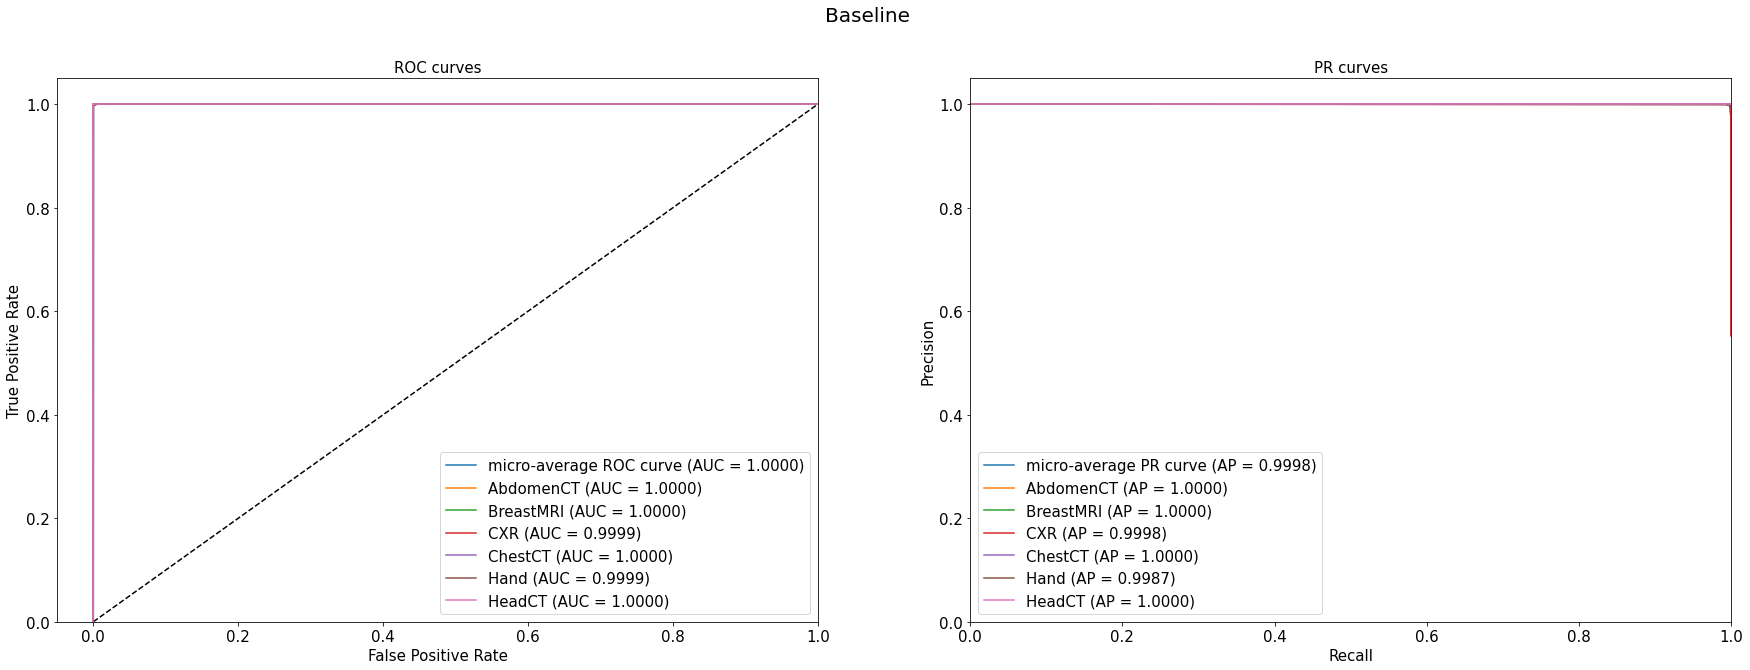

In [ ]:
plt.figure(figsize=(30,10))
plt.suptitle('Baseline', fontsize=20)
plt.subplot(1,2,1)
plot_roc_curves(model_baseline, X_test_64, y_test_64)
plt.title('ROC curves', fontsize=15)
plt.subplot(1,2,2)
plot_pr_curves(model_baseline, X_test_64, y_test_64)
plt.title('PR curves', fontsize=15);

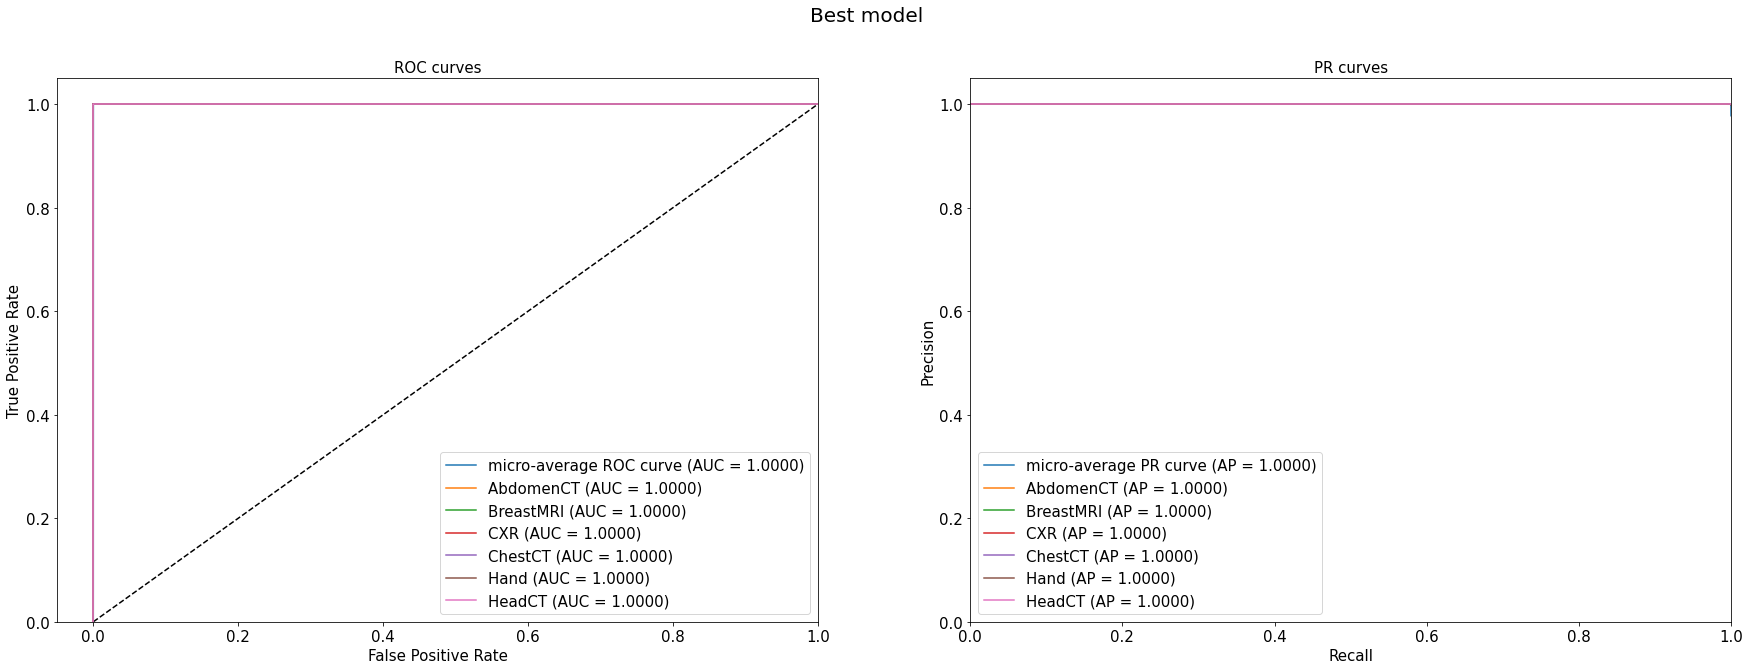

In [ ]:
plt.figure(figsize=(30,10))
plt.suptitle('Best model', fontsize=20)
plt.subplot(1,2,1)
plot_roc_curves(model_best, X_test_64, y_test_64)
plt.title('ROC curves', fontsize=15)
plt.subplot(1,2,2)
plot_pr_curves(model_best, X_test_64, y_test_64)
plt.title('PR curves', fontsize=15);

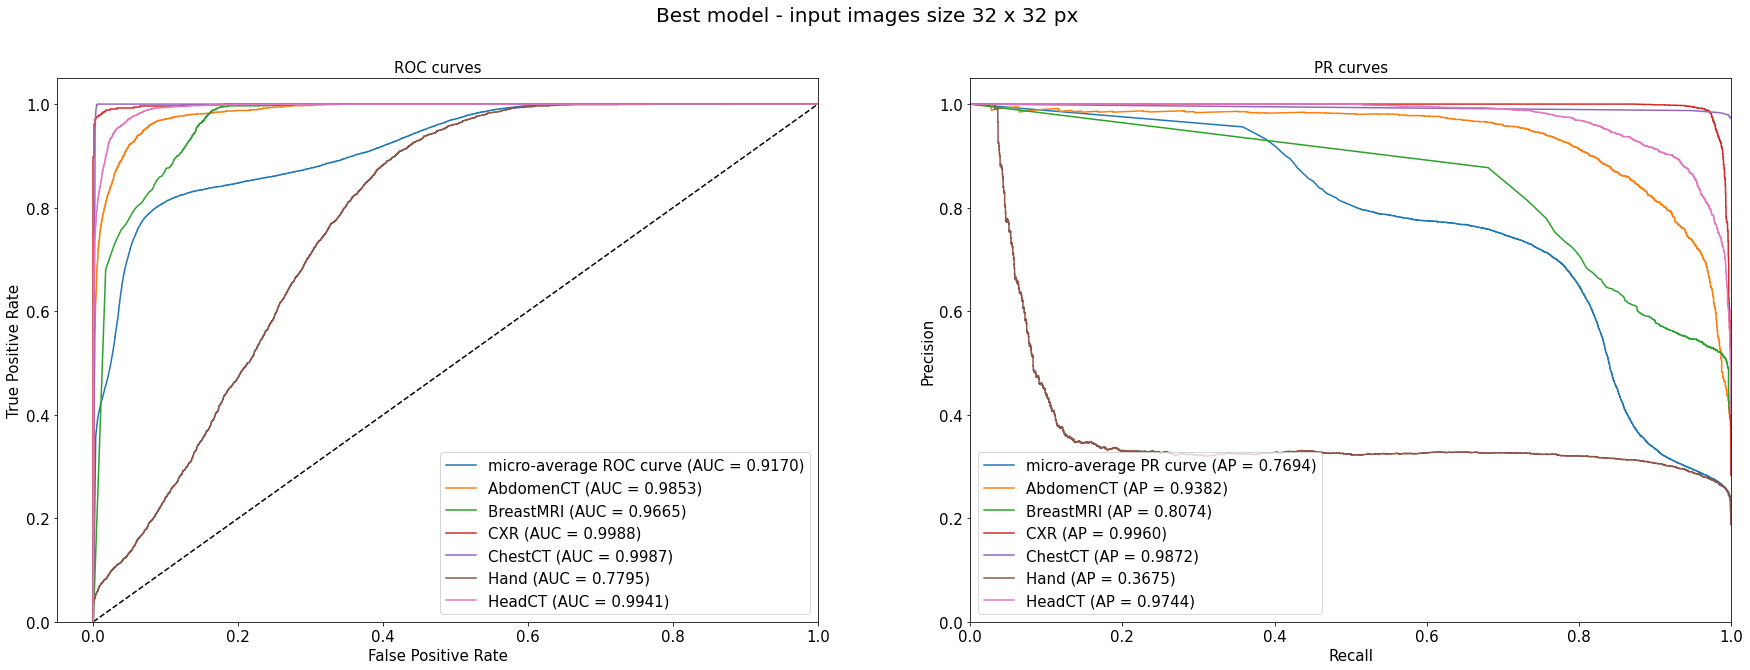

In [ ]:
plt.figure(figsize=(30,10))
plt.suptitle('Best model - input images size 32 x 32 px', fontsize=20)
plt.subplot(1,2,1)
plot_roc_curves(model_best, X_test_32, y_test_32)
plt.title('ROC curves', fontsize=15)
plt.subplot(1,2,2)
plot_pr_curves(model_best, X_test_32, y_test_32)
plt.title('PR curves', fontsize=15);

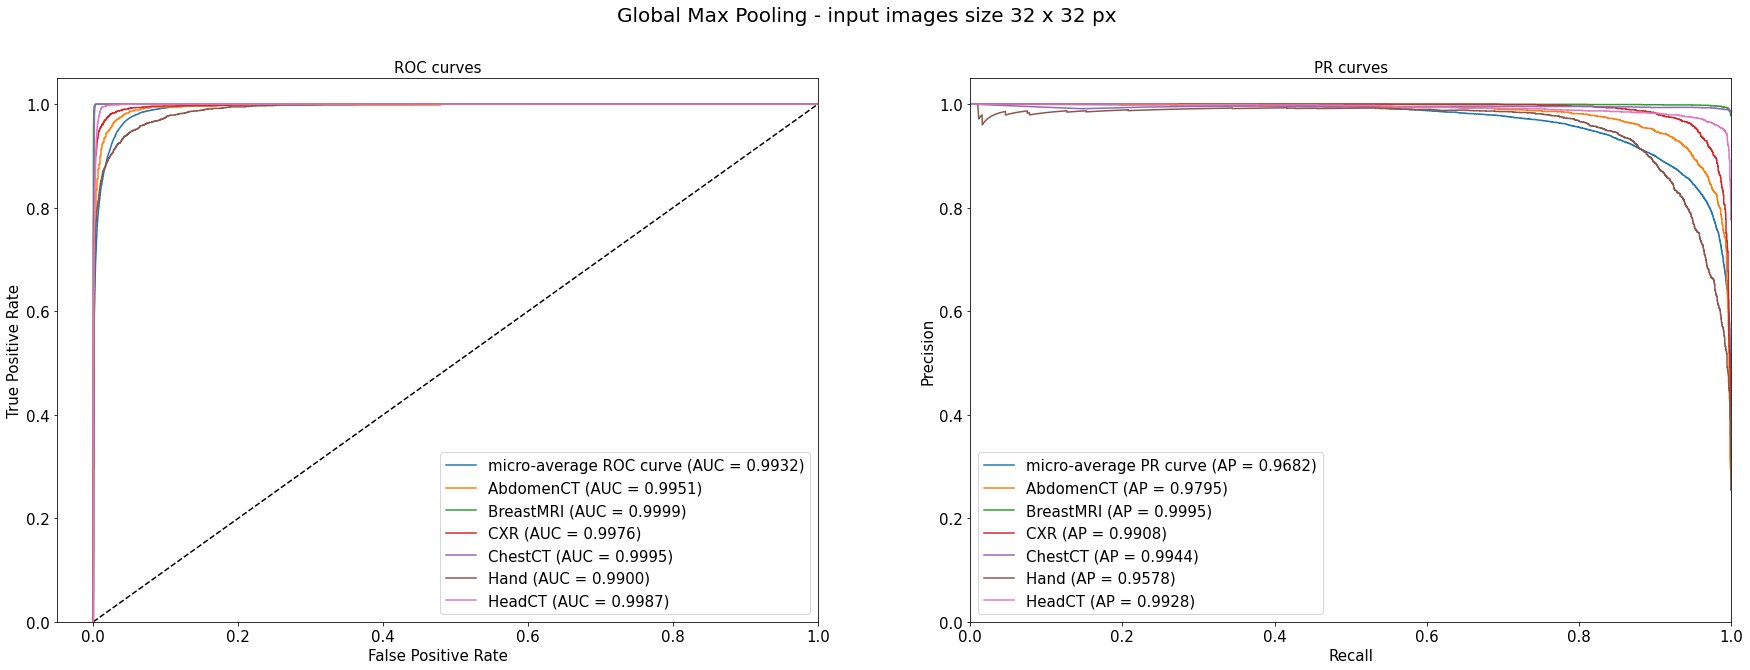

In [ ]:
plt.figure(figsize=(30,10))
plt.suptitle('Global Max Pooling - input images size 32 x 32 px', fontsize=20)
plt.subplot(1,2,1)
plot_roc_curves(model_gmp, X_test_32, y_test_32)
plt.title('ROC curves', fontsize=15)
plt.subplot(1,2,2)
plot_pr_curves(model_gmp, X_test_32, y_test_32)
plt.title('PR curves', fontsize=15);

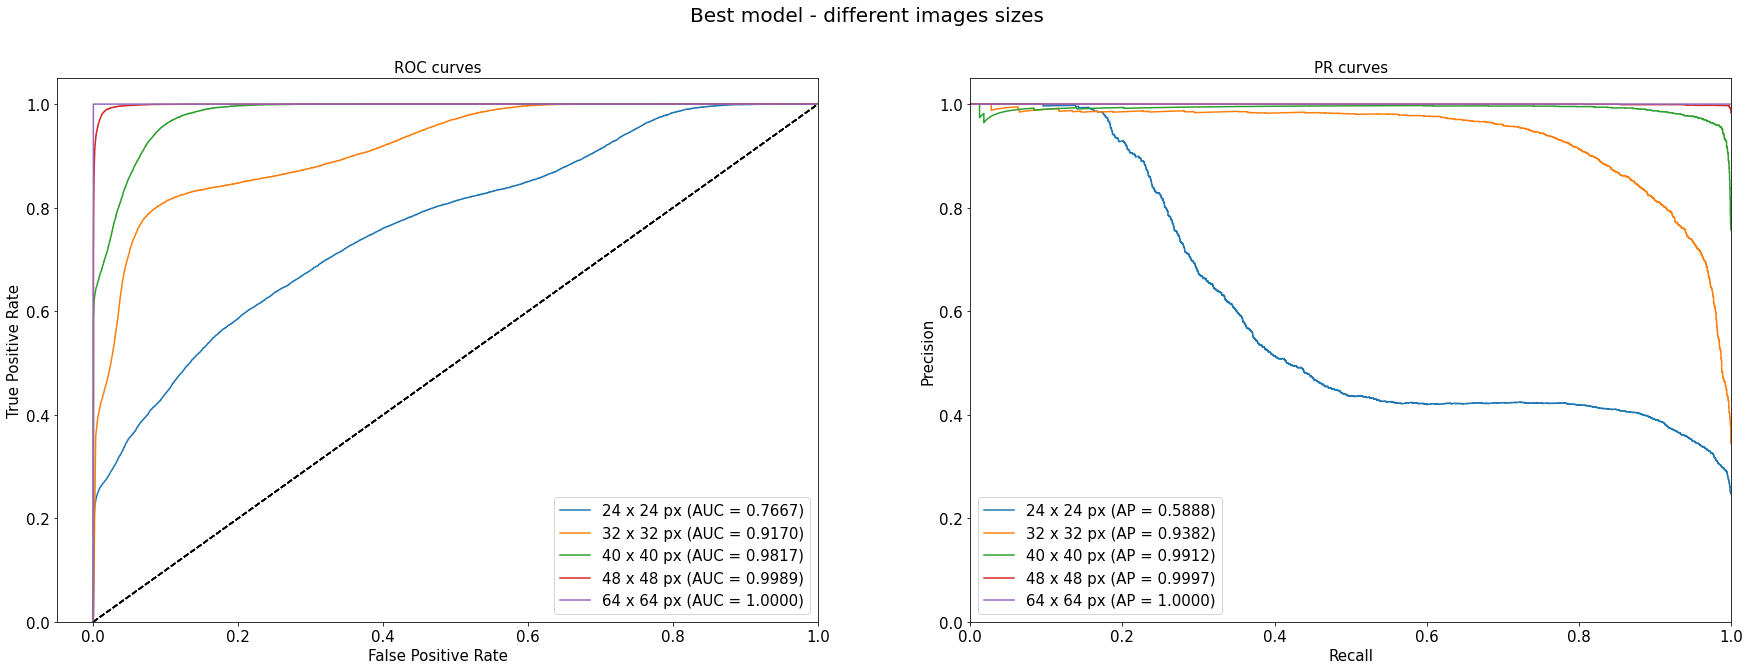

In [ ]:
plt.figure(figsize=(30,10))
plt.suptitle('Best model - different images sizes', fontsize=20)
plt.subplot(1,2,1)
roc_models([model_best], X_test_24, y_test_24, ['24 x 24 px'])
roc_models([model_best], X_test_32, y_test_32, ['32 x 32 px'])
roc_models([model_best], X_test_40, y_test_40, ['40 x 40 px'])
roc_models([model_best], X_test_48, y_test_48, ['48 x 48 px'])
roc_models([model_best], X_test_64, y_test_64, ['64 x 64 px'])
plt.title('ROC curves', fontsize=15)
plt.subplot(1,2,2)
pr_models([model_best], X_test_24, y_test_24, ['24 x 24 px'])
pr_models([model_best], X_test_32, y_test_32, ['32 x 32 px'])
pr_models([model_best], X_test_40, y_test_40, ['40 x 40 px'])
pr_models([model_best], X_test_48, y_test_48, ['48 x 48 px'])
pr_models([model_best], X_test_64, y_test_64, ['64 x 64 px'])
plt.title('PR curves', fontsize=15);

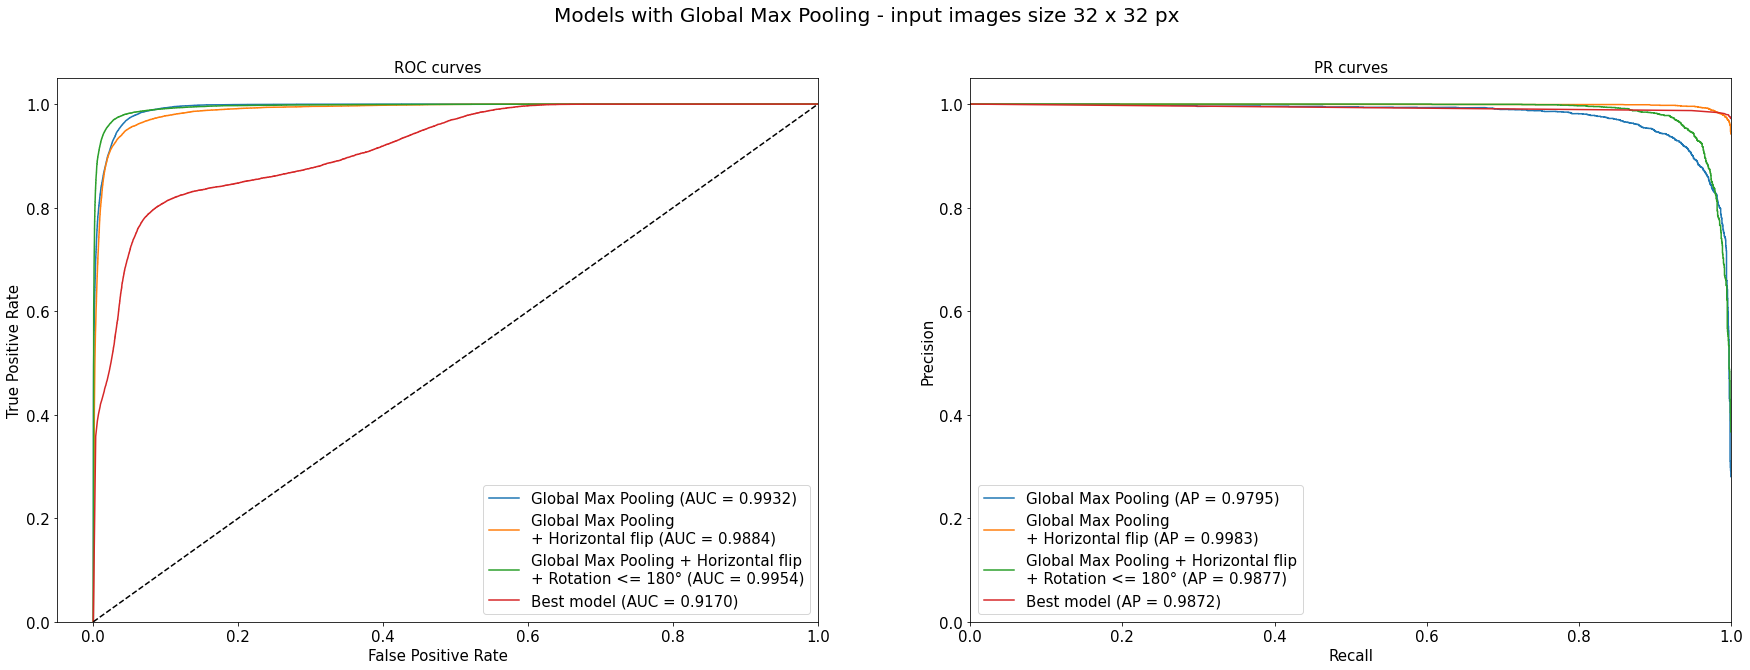

In [ ]:
models = [model_gmp, model_gmp_hflip, model_gmp_hflip_rot180, model_best]
plot_labels = ['Global Max Pooling', 'Global Max Pooling\n+ Horizontal flip', 'Global Max Pooling + Horizontal flip\n+ Rotation <= 180°', 'Best model']

plt.figure(figsize=(30,10))
plt.suptitle('Models with Global Max Pooling - input images size 32 x 32 px', fontsize=20)
plt.subplot(1,2,1)
roc_models(models, X_test_32, y_test_32, plot_labels)
plt.title('ROC curves', fontsize=15)
plt.subplot(1,2,2)
pr_models(models, X_test_32, y_test_32, plot_labels)
plt.title('PR curves', fontsize=15);

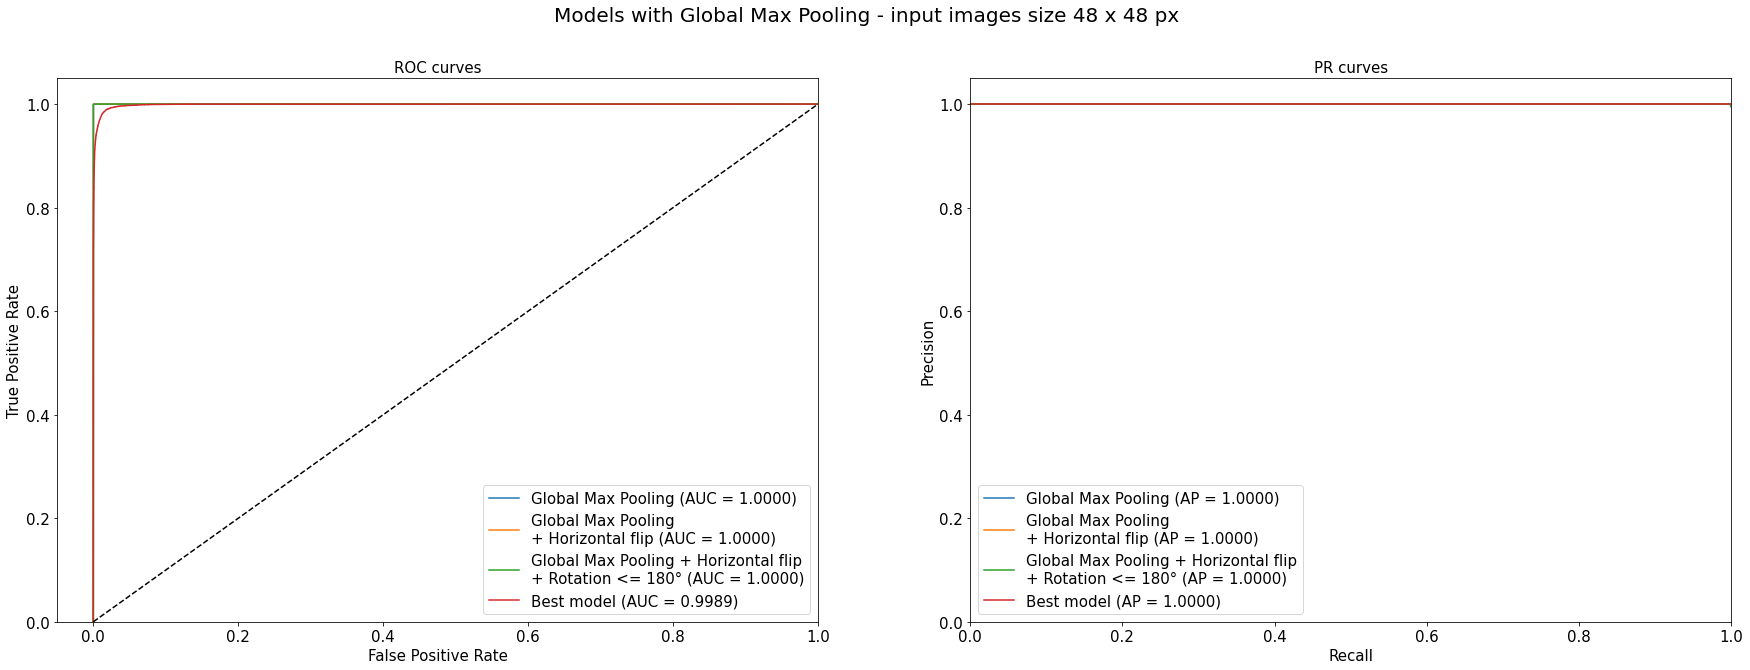

In [ ]:
plt.figure(figsize=(30,10))
plt.suptitle('Models with Global Max Pooling - input images size 48 x 48 px', fontsize=20)
plt.subplot(1,2,1)
roc_models(models, X_test_48, y_test_48, plot_labels)
plt.title('ROC curves', fontsize=15);
plt.subplot(1,2,2)
pr_models(models, X_test_48, y_test_48, plot_labels)
plt.title('PR curves', fontsize=15);

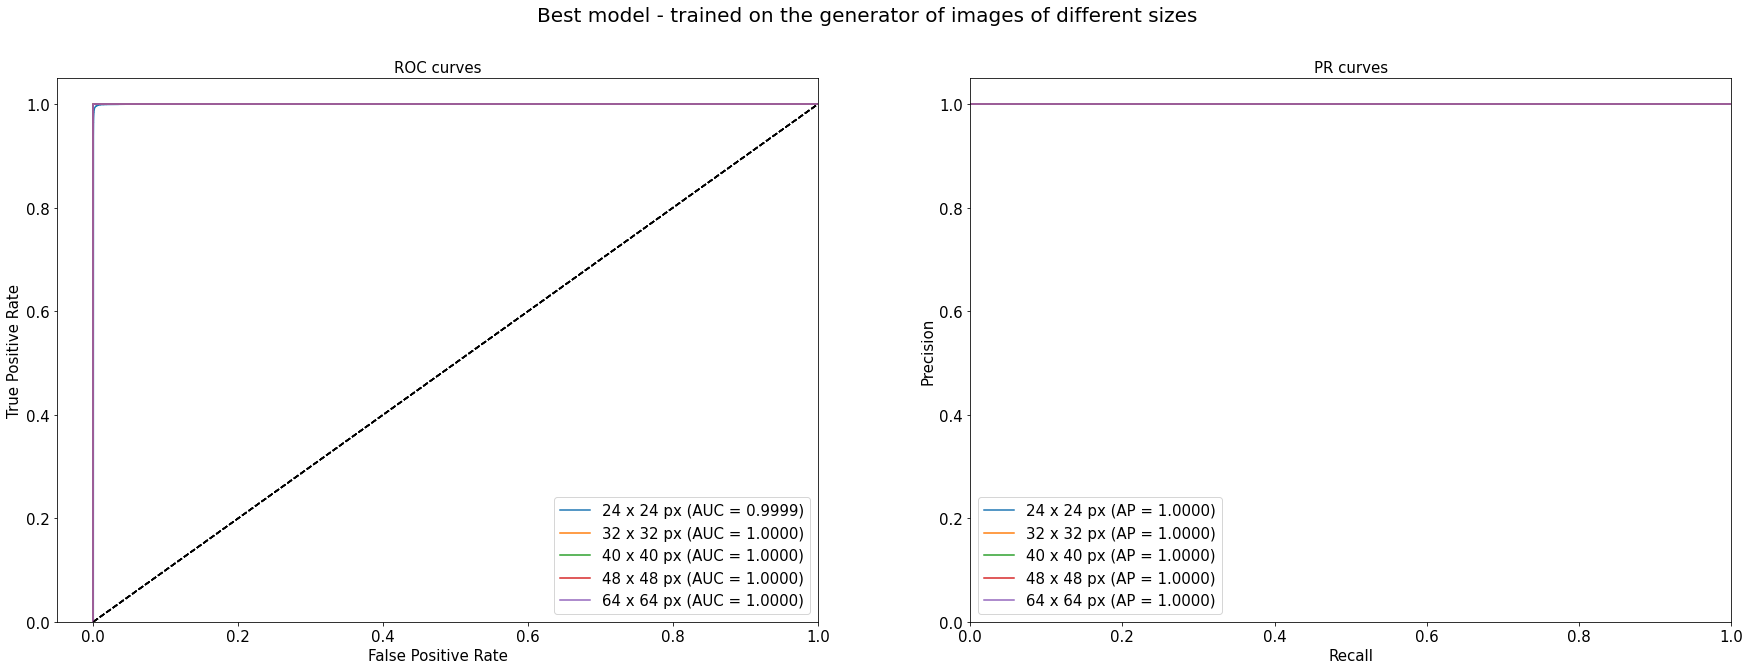

In [ ]:
plt.figure(figsize=(30,10))
plt.suptitle('Best model - trained on the generator of images of different sizes', fontsize=20)
plt.subplot(1,2,1)
roc_models([model_best_var_sizes], X_test_24, y_test_24, ['24 x 24 px'])
roc_models([model_best_var_sizes], X_test_32, y_test_32, ['32 x 32 px'])
roc_models([model_best_var_sizes], X_test_40, y_test_40, ['40 x 40 px'])
roc_models([model_best_var_sizes], X_test_48, y_test_48, ['48 x 48 px'])
roc_models([model_best_var_sizes], X_test_64, y_test_64, ['64 x 64 px'])
plt.title('ROC curves', fontsize=15)
plt.subplot(1,2,2)
pr_models([model_best_var_sizes], X_test_24, y_test_24, ['24 x 24 px'])
pr_models([model_best_var_sizes], X_test_32, y_test_32, ['32 x 32 px'])
pr_models([model_best_var_sizes], X_test_40, y_test_40, ['40 x 40 px'])
pr_models([model_best_var_sizes], X_test_48, y_test_48, ['48 x 48 px'])
pr_models([model_best_var_sizes], X_test_64, y_test_64, ['64 x 64 px'])
plt.title('PR curves', fontsize=15);

## Images from outside the data set

In [ ]:
!wget https://prod-images-static.radiopaedia.org/images/12503817/f738c62fe9ca2161bb47480bc2ec9e_big_gallery.jpg -O '/content/abdomen-ct.jpg' #https://radiopaedia.org/cases/normal-ct-abdomen
!wget https://prod-images-static.radiopaedia.org/images/53186747/137ac00016672f6dc9bf8734a2592c_big_gallery.jpeg -O '/content/breast-mri.jpg' #https://radiopaedia.org/cases/normal-breast-mri-dense-breasts
!wget https://prod-images-static.radiopaedia.org/images/12722303/0d02f2d00abcb6875f1befb37da2d3_jumbo.jpeg -O '/content/cxr.png' #https://radiopaedia.org/cases/normal-chest-radiograph
!wget https://prod-images-static.radiopaedia.org/images/17483848/20b609e46e0fc771c322564ccff815_big_gallery.jpeg -O '/content/chect-ct.jpg' #https://radiopaedia.org/cases/normal-chest-ct
!wget https://prod-images-static.radiopaedia.org/images/25293630/3a9c605b616de1ed6dd1d2397bc394_jumbo.jpeg -O '/content/hand.jpg' #https://radiopaedia.org/cases/normal-hand
!wget https://prod-images-static.radiopaedia.org/images/4170261/c5d7c3ed6c7fe53e59c2dd902e44b9_big_gallery.jpg -O '/content/head-ct.jpg' #https://radiopaedia.org/cases/normal-ct-brain

--2020-12-31 15:07:05--  https://prod-images-static.radiopaedia.org/images/12503817/f738c62fe9ca2161bb47480bc2ec9e_big_gallery.jpg
Resolving prod-images-static.radiopaedia.org (prod-images-static.radiopaedia.org)... 104.26.9.61, 104.26.8.61, 172.67.72.247, ...
Connecting to prod-images-static.radiopaedia.org (prod-images-static.radiopaedia.org)|104.26.9.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87703 (86K) [image/jpeg]
Saving to: ‘/content/abdomen-ct.jpg’

/content/abdomen-ct 100%[===================>]  85.65K  --.-KB/s    in 0.005s  

2020-12-31 15:07:05 (16.5 MB/s) - ‘/content/abdomen-ct.jpg’ saved [87703/87703]

--2020-12-31 15:07:05--  https://prod-images-static.radiopaedia.org/images/53186747/137ac00016672f6dc9bf8734a2592c_big_gallery.jpeg
Resolving prod-images-static.radiopaedia.org (prod-images-static.radiopaedia.org)... 104.26.9.61, 104.26.8.61, 172.67.72.247, ...
Connecting to prod-images-static.radiopaedia.org (prod-images-static.radiopaedia

In [ ]:
def prepare_and_predict(img_path, model, true_label):
  img = Image.open(img_path)
  img = img.resize((64,64))
  img = img.convert('L')
  img = np.asarray(img, dtype=np.int16)
  img = img / 255
  img = np.expand_dims(img, axis=-1)
  img_X = np.expand_dims(img, axis=0)

  labels = ['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']

  pred = model.predict(img_X)

  plt.imshow(np.squeeze(img), cmap='gray')
  plt.title('True: ' + true_label + '\nPred: ' + labels[np.argmax(pred[0])], fontsize=15)

Best model:

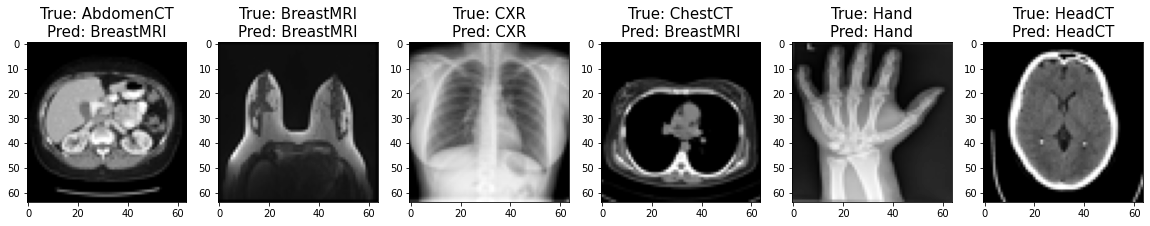

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,6,1)
prepare_and_predict('/content/abdomen-ct.jpg', model_best, 'AbdomenCT')
plt.subplot(2,6,2)
prepare_and_predict('/content/breast-mri.jpg', model_best, 'BreastMRI')
plt.subplot(2,6,3)
prepare_and_predict('/content/cxr.png', model_best, 'CXR')
plt.subplot(2,6,4)
prepare_and_predict('/content/chect-ct.jpg', model_best, 'ChestCT')
plt.subplot(2,6,5)
prepare_and_predict('/content/hand.jpg', model_best, 'Hand')
plt.subplot(2,6,6)
prepare_and_predict('/content/head-ct.jpg', model_best, 'HeadCT')

Best model trained on the generator of images of different sizes:

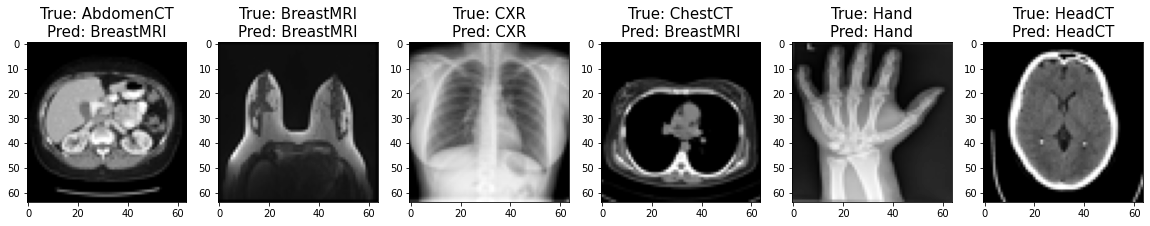

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,6,1)
prepare_and_predict('/content/abdomen-ct.jpg', model_best_var_sizes, 'AbdomenCT')
plt.subplot(2,6,2)
prepare_and_predict('/content/breast-mri.jpg', model_best_var_sizes, 'BreastMRI')
plt.subplot(2,6,3)
prepare_and_predict('/content/cxr.png', model_best_var_sizes, 'CXR')
plt.subplot(2,6,4)
prepare_and_predict('/content/chect-ct.jpg', model_best_var_sizes, 'ChestCT')
plt.subplot(2,6,5)
prepare_and_predict('/content/hand.jpg', model_best_var_sizes, 'Hand')
plt.subplot(2,6,6)
prepare_and_predict('/content/head-ct.jpg', model_best_var_sizes, 'HeadCT')